## 代码功能介绍：  
### 1. 实现了包含2层隐含层的BP神经网络模型，支持设定输入层、隐含层、输出层的维度
### 2. 对比了两种训练方式： 
####     ①输出维度1，以回归的方式训练，将最终的结果取整判断分类是否正确，准确率约65%  
####     ②输出维度10，以分类的方式训练，选用交叉熵损失，准确率约90%

In [10]:
## 导入模型和数据集
from bp import *
from data import *
import matplotlib.pyplot as plt

In [2]:
# 超参设置
epoch = 150
input_dim = 25
batch_size = 512
hidden_dim = [60,40]
#class_num = 10

In [3]:
#  产生数据集
data_set = MnistDataSet('./mnist',feature_dim=input_dim, batch_size=batch_size)

## 模型1：回归方式训练，将回归结果取整得到类别

In [6]:
# 输出维度
output_dim1 = 1
# 创建模型
bp_net1 = BP(input_dim, output_dim1, hidden_dim, True, 'sigmoid')
# 创建优化器
optimizer1 = optim.SGD(bp_net1.parameters(), lr=0.01, momentum=0.9) 
# 创建损失函数
criterion1 = nn.MSELoss(reduction='mean')


In [9]:
# 模型训练
loss_list1 = []
for i in range(epoch):
    for batch_data, batch_label in data_set.next():
        input = torch.from_numpy(batch_data).float()
        label = torch.from_numpy(batch_label).view([len(batch_label),1]).float()
        output = bp_net1(input)
        loss = criterion1(output, label) 
        loss_list1.append(loss)
        print("epoch={},loss={}".format(i,loss))
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

epoch=0,loss=235.99264526367188
epoch=0,loss=18.177722930908203
epoch=0,loss=101.26953887939453
epoch=0,loss=199.4059600830078
epoch=0,loss=55.1414680480957
epoch=0,loss=27.202354431152344
epoch=0,loss=128.09840393066406
epoch=0,loss=86.17633819580078
epoch=0,loss=8.488995552062988
epoch=0,loss=66.11116027832031
epoch=0,loss=90.9931640625
epoch=0,loss=21.704423904418945
epoch=0,loss=21.775680541992188
epoch=0,loss=69.59398651123047
epoch=0,loss=41.91935729980469
epoch=0,loss=9.245469093322754
epoch=0,loss=44.871803283691406
epoch=0,loss=45.3048095703125
epoch=0,loss=12.402400016784668
epoch=0,loss=18.54963493347168
epoch=0,loss=38.407920837402344
epoch=0,loss=21.811338424682617
epoch=0,loss=9.065756797790527
epoch=0,loss=25.782072067260742
epoch=0,loss=24.856534957885742
epoch=0,loss=10.783462524414062
epoch=0,loss=13.10267162322998
epoch=0,loss=23.041542053222656
epoch=0,loss=13.266632080078125
epoch=0,loss=8.713216781616211
epoch=0,loss=15.227937698364258
epoch=0,loss=16.803045272827

epoch=2,loss=3.4409539699554443
epoch=2,loss=3.3586082458496094
epoch=2,loss=3.76078462600708
epoch=2,loss=3.2344210147857666
epoch=2,loss=3.2647738456726074
epoch=2,loss=2.778803586959839
epoch=2,loss=4.117743015289307
epoch=2,loss=2.7816238403320312
epoch=2,loss=2.906377077102661
epoch=2,loss=3.9728691577911377
epoch=2,loss=3.5254011154174805
epoch=2,loss=4.061985492706299
epoch=2,loss=3.6244611740112305
epoch=2,loss=3.1191108226776123
epoch=2,loss=3.262214183807373
epoch=2,loss=3.7325243949890137
epoch=2,loss=3.008125066757202
epoch=2,loss=3.5798070430755615
epoch=2,loss=3.660438060760498
epoch=2,loss=3.473680257797241
epoch=2,loss=3.69851016998291
epoch=2,loss=3.7104814052581787
epoch=2,loss=2.9894320964813232
epoch=2,loss=3.2019851207733154
epoch=2,loss=3.1330811977386475
epoch=2,loss=3.5790343284606934
epoch=2,loss=3.0198652744293213
epoch=2,loss=3.787292957305908
epoch=2,loss=3.3516201972961426
epoch=2,loss=3.176635980606079
epoch=2,loss=2.926297903060913
epoch=2,loss=2.59333562

epoch=5,loss=1.7368552684783936
epoch=5,loss=2.4719343185424805
epoch=5,loss=2.2272701263427734
epoch=5,loss=2.135770797729492
epoch=5,loss=2.3990776538848877
epoch=5,loss=2.680598735809326
epoch=5,loss=2.1654255390167236
epoch=5,loss=1.9938013553619385
epoch=5,loss=2.080258846282959
epoch=5,loss=2.007676839828491
epoch=5,loss=2.6649155616760254
epoch=5,loss=2.490419864654541
epoch=5,loss=2.166489601135254
epoch=5,loss=1.9861935377120972
epoch=5,loss=2.440528631210327
epoch=5,loss=2.27054500579834
epoch=5,loss=2.305405616760254
epoch=5,loss=2.136202573776245
epoch=5,loss=2.448256731033325
epoch=5,loss=2.565352439880371
epoch=5,loss=2.2237298488616943
epoch=5,loss=2.2560625076293945
epoch=5,loss=2.6046857833862305
epoch=5,loss=2.0119855403900146
epoch=5,loss=2.5671443939208984
epoch=5,loss=2.2786478996276855
epoch=5,loss=2.0718939304351807
epoch=5,loss=2.298011302947998
epoch=5,loss=2.1169755458831787
epoch=5,loss=2.215198278427124
epoch=5,loss=2.453251600265503
epoch=5,loss=2.035591363

epoch=7,loss=1.7192529439926147
epoch=7,loss=1.5684807300567627
epoch=7,loss=2.761296272277832
epoch=7,loss=1.7135400772094727
epoch=7,loss=1.6886260509490967
epoch=7,loss=1.6304261684417725
epoch=7,loss=1.8284755945205688
epoch=7,loss=1.785191535949707
epoch=7,loss=1.515056848526001
epoch=7,loss=1.9965254068374634
epoch=7,loss=1.8979820013046265
epoch=7,loss=1.6116232872009277
epoch=7,loss=1.344617486000061
epoch=7,loss=1.4751217365264893
epoch=7,loss=1.3059929609298706
epoch=7,loss=1.5875468254089355
epoch=8,loss=1.5120290517807007
epoch=8,loss=1.9441215991973877
epoch=8,loss=1.8571670055389404
epoch=8,loss=1.464080572128296
epoch=8,loss=1.6305785179138184
epoch=8,loss=2.108304023742676
epoch=8,loss=1.7446789741516113
epoch=8,loss=1.5875872373580933
epoch=8,loss=2.0529966354370117
epoch=8,loss=1.8913928270339966
epoch=8,loss=1.8710302114486694
epoch=8,loss=1.4357373714447021
epoch=8,loss=1.3105628490447998
epoch=8,loss=1.8566864728927612
epoch=8,loss=2.10329532623291
epoch=8,loss=1.7

epoch=10,loss=1.7428491115570068
epoch=10,loss=1.9844796657562256
epoch=10,loss=1.6389455795288086
epoch=10,loss=1.623687505722046
epoch=10,loss=1.6821858882904053
epoch=10,loss=1.6712985038757324
epoch=10,loss=1.824410080909729
epoch=10,loss=1.8665270805358887
epoch=10,loss=1.6958789825439453
epoch=10,loss=2.0971522331237793
epoch=10,loss=1.6506807804107666
epoch=10,loss=1.9805947542190552
epoch=10,loss=1.4474339485168457
epoch=10,loss=1.6124060153961182
epoch=10,loss=1.3959503173828125
epoch=10,loss=2.1374971866607666
epoch=10,loss=1.629030466079712
epoch=10,loss=1.4256823062896729
epoch=10,loss=1.5667500495910645
epoch=10,loss=1.4539546966552734
epoch=10,loss=1.7043368816375732
epoch=10,loss=1.9089164733886719
epoch=10,loss=1.6883374452590942
epoch=10,loss=1.7252094745635986
epoch=10,loss=1.5600658655166626
epoch=10,loss=2.0022358894348145
epoch=10,loss=1.6297106742858887
epoch=10,loss=1.7288979291915894
epoch=10,loss=1.9721612930297852
epoch=10,loss=1.7258638143539429
epoch=10,loss

epoch=12,loss=1.4506866931915283
epoch=12,loss=1.4439024925231934
epoch=12,loss=1.6215471029281616
epoch=12,loss=1.6067311763763428
epoch=12,loss=1.146416187286377
epoch=12,loss=1.629915714263916
epoch=12,loss=1.6076273918151855
epoch=12,loss=1.4297187328338623
epoch=12,loss=1.1576931476593018
epoch=12,loss=1.2620913982391357
epoch=12,loss=1.072033166885376
epoch=12,loss=1.366318941116333
epoch=13,loss=1.1698992252349854
epoch=13,loss=1.8009816408157349
epoch=13,loss=1.6124438047409058
epoch=13,loss=1.2658026218414307
epoch=13,loss=1.4164068698883057
epoch=13,loss=1.777478814125061
epoch=13,loss=1.404526948928833
epoch=13,loss=1.372070074081421
epoch=13,loss=1.674404501914978
epoch=13,loss=1.495118498802185
epoch=13,loss=1.5950489044189453
epoch=13,loss=1.1713860034942627
epoch=13,loss=1.0876495838165283
epoch=13,loss=1.6606708765029907
epoch=13,loss=1.6614413261413574
epoch=13,loss=1.4450340270996094
epoch=13,loss=1.7594091892242432
epoch=13,loss=2.0707318782806396
epoch=13,loss=1.644

epoch=15,loss=1.7436492443084717
epoch=15,loss=1.555665373802185
epoch=15,loss=1.4765734672546387
epoch=15,loss=1.5746045112609863
epoch=15,loss=1.6375371217727661
epoch=15,loss=1.5601792335510254
epoch=15,loss=1.5968871116638184
epoch=15,loss=1.3893420696258545
epoch=15,loss=1.5370233058929443
epoch=15,loss=1.6006083488464355
epoch=15,loss=1.7531381845474243
epoch=15,loss=1.44901704788208
epoch=15,loss=1.4480499029159546
epoch=15,loss=1.3566935062408447
epoch=15,loss=1.522265911102295
epoch=15,loss=1.5958976745605469
epoch=15,loss=1.6078681945800781
epoch=15,loss=1.4240820407867432
epoch=15,loss=1.8769091367721558
epoch=15,loss=1.4470573663711548
epoch=15,loss=1.7842919826507568
epoch=15,loss=1.2356454133987427
epoch=15,loss=1.4028042554855347
epoch=15,loss=1.1987892389297485
epoch=15,loss=1.8698688745498657
epoch=15,loss=1.4184086322784424
epoch=15,loss=1.3147189617156982
epoch=15,loss=1.3296775817871094
epoch=15,loss=1.2494003772735596
epoch=15,loss=1.5905358791351318
epoch=15,loss=

epoch=17,loss=1.0748217105865479
epoch=17,loss=1.1389081478118896
epoch=17,loss=0.971664547920227
epoch=17,loss=1.241639494895935
epoch=18,loss=1.0492372512817383
epoch=18,loss=1.7047154903411865
epoch=18,loss=1.4398326873779297
epoch=18,loss=1.1450858116149902
epoch=18,loss=1.213518738746643
epoch=18,loss=1.5766398906707764
epoch=18,loss=1.2662910223007202
epoch=18,loss=1.2551618814468384
epoch=18,loss=1.5311975479125977
epoch=18,loss=1.3910353183746338
epoch=18,loss=1.4804396629333496
epoch=18,loss=1.0930622816085815
epoch=18,loss=1.0212392807006836
epoch=18,loss=1.5861459970474243
epoch=18,loss=1.4528164863586426
epoch=18,loss=1.2746199369430542
epoch=18,loss=1.5906972885131836
epoch=18,loss=1.925596833229065
epoch=18,loss=1.5450533628463745
epoch=18,loss=1.4233888387680054
epoch=18,loss=1.1100033521652222
epoch=18,loss=1.280817985534668
epoch=18,loss=1.3910117149353027
epoch=18,loss=1.3716486692428589
epoch=18,loss=1.9919183254241943
epoch=18,loss=1.3012279272079468
epoch=18,loss=1

epoch=20,loss=1.5308772325515747
epoch=20,loss=1.5566514730453491
epoch=20,loss=1.330872893333435
epoch=20,loss=1.3296393156051636
epoch=20,loss=1.1856023073196411
epoch=20,loss=1.4123214483261108
epoch=20,loss=1.4672186374664307
epoch=20,loss=1.4819824695587158
epoch=20,loss=1.2606405019760132
epoch=20,loss=1.7398444414138794
epoch=20,loss=1.3096158504486084
epoch=20,loss=1.6522725820541382
epoch=20,loss=1.1303082704544067
epoch=20,loss=1.2969356775283813
epoch=20,loss=1.099859595298767
epoch=20,loss=1.7404788732528687
epoch=20,loss=1.2871986627578735
epoch=20,loss=1.2033096551895142
epoch=20,loss=1.2439162731170654
epoch=20,loss=1.1710913181304932
epoch=20,loss=1.4507917165756226
epoch=20,loss=1.6291886568069458
epoch=20,loss=1.3073912858963013
epoch=20,loss=1.4871703386306763
epoch=20,loss=1.1883466243743896
epoch=20,loss=1.8387476205825806
epoch=20,loss=1.427958369255066
epoch=20,loss=1.4410978555679321
epoch=20,loss=1.7097524404525757
epoch=20,loss=1.3760168552398682
epoch=20,loss

epoch=22,loss=1.3746856451034546
epoch=22,loss=1.3157507181167603
epoch=22,loss=1.40603768825531
epoch=22,loss=1.76119065284729
epoch=22,loss=1.19524085521698
epoch=22,loss=1.799646258354187
epoch=22,loss=1.2592029571533203
epoch=22,loss=1.100929856300354
epoch=22,loss=1.1999891996383667
epoch=22,loss=1.196873664855957
epoch=22,loss=1.9218077659606934
epoch=22,loss=1.2778409719467163
epoch=22,loss=1.2920845746994019
epoch=22,loss=1.1723767518997192
epoch=22,loss=1.371699571609497
epoch=22,loss=1.3364160060882568
epoch=22,loss=1.0574816465377808
epoch=22,loss=1.3554489612579346
epoch=22,loss=1.3606102466583252
epoch=22,loss=1.1875189542770386
epoch=22,loss=0.9819875359535217
epoch=22,loss=1.0660628080368042
epoch=22,loss=0.933899462223053
epoch=22,loss=1.175422191619873
epoch=23,loss=1.0062098503112793
epoch=23,loss=1.647475242614746
epoch=23,loss=1.341335654258728
epoch=23,loss=1.078852891921997
epoch=23,loss=1.072008728981018
epoch=23,loss=1.5052908658981323
epoch=23,loss=1.1585055589

epoch=25,loss=1.060197353363037
epoch=25,loss=1.2053227424621582
epoch=25,loss=1.2881536483764648
epoch=25,loss=1.2284518480300903
epoch=25,loss=1.8227956295013428
epoch=25,loss=1.1552406549453735
epoch=25,loss=1.4479014873504639
epoch=25,loss=1.7355257272720337
epoch=25,loss=1.8412827253341675
epoch=25,loss=0.9918062686920166
epoch=25,loss=1.5150933265686035
epoch=25,loss=1.1156882047653198
epoch=25,loss=1.2943772077560425
epoch=25,loss=1.2995631694793701
epoch=25,loss=1.5449696779251099
epoch=25,loss=1.1492242813110352
epoch=25,loss=0.973464846611023
epoch=25,loss=1.2563343048095703
epoch=25,loss=1.0928776264190674
epoch=25,loss=1.3885163068771362
epoch=25,loss=1.5076996088027954
epoch=25,loss=1.241758108139038
epoch=25,loss=1.2726075649261475
epoch=25,loss=1.5707424879074097
epoch=25,loss=1.382749319076538
epoch=25,loss=1.2730650901794434
epoch=25,loss=1.3775930404663086
epoch=25,loss=1.468709945678711
epoch=25,loss=1.4000698328018188
epoch=25,loss=1.3721669912338257
epoch=25,loss=1

epoch=27,loss=1.4450321197509766
epoch=27,loss=1.0538873672485352
epoch=27,loss=1.137177586555481
epoch=27,loss=0.9962109327316284
epoch=27,loss=1.5973684787750244
epoch=27,loss=1.161872148513794
epoch=27,loss=1.0470373630523682
epoch=27,loss=1.224835753440857
epoch=27,loss=1.0256298780441284
epoch=27,loss=1.3585162162780762
epoch=27,loss=1.4968035221099854
epoch=27,loss=1.2052830457687378
epoch=27,loss=1.3914753198623657
epoch=27,loss=1.142077922821045
epoch=27,loss=1.7770256996154785
epoch=27,loss=1.2638208866119385
epoch=27,loss=1.345765233039856
epoch=27,loss=1.5863507986068726
epoch=27,loss=1.2446492910385132
epoch=27,loss=1.6922119855880737
epoch=27,loss=1.444541335105896
epoch=27,loss=1.197058916091919
epoch=27,loss=1.424020767211914
epoch=27,loss=1.665156602859497
epoch=27,loss=1.2427266836166382
epoch=27,loss=1.4190971851348877
epoch=27,loss=1.649856686592102
epoch=27,loss=1.6830874681472778
epoch=27,loss=1.6320760250091553
epoch=27,loss=1.554296851158142
epoch=27,loss=1.35246

epoch=29,loss=1.227232575416565
epoch=29,loss=1.101812481880188
epoch=29,loss=0.8827692866325378
epoch=29,loss=0.991818368434906
epoch=29,loss=0.877322793006897
epoch=29,loss=1.0303441286087036
epoch=30,loss=0.9075217247009277
epoch=30,loss=1.563851237297058
epoch=30,loss=1.2616372108459473
epoch=30,loss=0.9881274700164795
epoch=30,loss=0.9338807463645935
epoch=30,loss=1.3722420930862427
epoch=30,loss=1.0416473150253296
epoch=30,loss=1.066070318222046
epoch=30,loss=1.2314916849136353
epoch=30,loss=1.1543693542480469
epoch=30,loss=1.26591956615448
epoch=30,loss=0.8635427355766296
epoch=30,loss=0.8426586985588074
epoch=30,loss=1.427280068397522
epoch=30,loss=1.2600356340408325
epoch=30,loss=1.0319260358810425
epoch=30,loss=1.420074224472046
epoch=30,loss=1.7181167602539062
epoch=30,loss=1.3316047191619873
epoch=30,loss=1.2094180583953857
epoch=30,loss=0.9800903797149658
epoch=30,loss=1.1181820631027222
epoch=30,loss=1.2042409181594849
epoch=30,loss=1.173837423324585
epoch=30,loss=1.75573

epoch=32,loss=0.968022346496582
epoch=32,loss=1.2627403736114502
epoch=32,loss=1.3806556463241577
epoch=32,loss=1.1005840301513672
epoch=32,loss=1.2082140445709229
epoch=32,loss=1.4687695503234863
epoch=32,loss=1.3409429788589478
epoch=32,loss=1.1313285827636719
epoch=32,loss=1.2029832601547241
epoch=32,loss=1.356332540512085
epoch=32,loss=1.3147366046905518
epoch=32,loss=1.2830696105957031
epoch=32,loss=1.116365671157837
epoch=32,loss=1.2374510765075684
epoch=32,loss=1.3997801542282104
epoch=32,loss=1.3061003684997559
epoch=32,loss=1.1899100542068481
epoch=32,loss=1.2257280349731445
epoch=32,loss=0.9605458974838257
epoch=32,loss=1.1954152584075928
epoch=32,loss=1.2537401914596558
epoch=32,loss=1.3149197101593018
epoch=32,loss=1.0661218166351318
epoch=32,loss=1.523514747619629
epoch=32,loss=1.1702066659927368
epoch=32,loss=1.3440810441970825
epoch=32,loss=1.0263808965682983
epoch=32,loss=1.066009283065796
epoch=32,loss=0.9181612730026245
epoch=32,loss=1.4801982641220093
epoch=32,loss=1

epoch=34,loss=1.1101192235946655
epoch=34,loss=1.3741302490234375
epoch=34,loss=1.5489535331726074
epoch=34,loss=1.130971908569336
epoch=34,loss=1.409217119216919
epoch=34,loss=1.573244333267212
epoch=34,loss=1.5285025835037231
epoch=34,loss=1.6832914352416992
epoch=34,loss=1.4366893768310547
epoch=34,loss=1.318023681640625
epoch=34,loss=1.188355565071106
epoch=34,loss=1.179490566253662
epoch=34,loss=1.593288779258728
epoch=34,loss=1.0033594369888306
epoch=34,loss=1.5824201107025146
epoch=34,loss=1.1149656772613525
epoch=34,loss=0.9795212745666504
epoch=34,loss=1.0420019626617432
epoch=34,loss=1.0656824111938477
epoch=34,loss=1.7067039012908936
epoch=34,loss=1.1000422239303589
epoch=34,loss=1.1307529211044312
epoch=34,loss=0.9597407579421997
epoch=34,loss=1.2338215112686157
epoch=34,loss=1.2484086751937866
epoch=34,loss=0.9380188584327698
epoch=34,loss=1.1286712884902954
epoch=34,loss=1.22223961353302
epoch=34,loss=1.0641717910766602
epoch=34,loss=0.8314998149871826
epoch=34,loss=0.966

epoch=37,loss=1.2136945724487305
epoch=37,loss=1.0128651857376099
epoch=37,loss=1.3373243808746338
epoch=37,loss=1.540609359741211
epoch=37,loss=1.3046804666519165
epoch=37,loss=1.1039320230484009
epoch=37,loss=0.9093782305717468
epoch=37,loss=1.0256710052490234
epoch=37,loss=1.1153814792633057
epoch=37,loss=1.144004225730896
epoch=37,loss=1.6755120754241943
epoch=37,loss=0.9748600721359253
epoch=37,loss=1.2192597389221191
epoch=37,loss=1.4454766511917114
epoch=37,loss=1.5902647972106934
epoch=37,loss=0.9718557596206665
epoch=37,loss=1.3256772756576538
epoch=37,loss=1.0243358612060547
epoch=37,loss=1.10057532787323
epoch=37,loss=1.1363462209701538
epoch=37,loss=1.397857904434204
epoch=37,loss=0.9905754923820496
epoch=37,loss=0.8669005632400513
epoch=37,loss=1.0086218118667603
epoch=37,loss=0.9364223480224609
epoch=37,loss=1.2131041288375854
epoch=37,loss=1.324689269065857
epoch=37,loss=1.0438485145568848
epoch=37,loss=1.1866027116775513
epoch=37,loss=1.420405626296997
epoch=37,loss=1.3

epoch=39,loss=1.256792664527893
epoch=39,loss=0.9811002016067505
epoch=39,loss=1.000417947769165
epoch=39,loss=0.8396121263504028
epoch=39,loss=1.4004127979278564
epoch=39,loss=1.0135822296142578
epoch=39,loss=0.9219604134559631
epoch=39,loss=1.1560282707214355
epoch=39,loss=0.9510861039161682
epoch=39,loss=1.2430739402770996
epoch=39,loss=1.3441754579544067
epoch=39,loss=1.099277377128601
epoch=39,loss=1.2644697427749634
epoch=39,loss=1.0444937944412231
epoch=39,loss=1.568326473236084
epoch=39,loss=1.085394024848938
epoch=39,loss=1.2568343877792358
epoch=39,loss=1.5093947649002075
epoch=39,loss=1.0164490938186646
epoch=39,loss=1.5159196853637695
epoch=39,loss=1.4407321214675903
epoch=39,loss=1.0519078969955444
epoch=39,loss=1.3092272281646729
epoch=39,loss=1.5101072788238525
epoch=39,loss=1.0642484426498413
epoch=39,loss=1.3495420217514038
epoch=39,loss=1.5251903533935547
epoch=39,loss=1.387799620628357
epoch=39,loss=1.6946934461593628
epoch=39,loss=1.3882255554199219
epoch=39,loss=1.

epoch=41,loss=0.7737141251564026
epoch=41,loss=0.8944182991981506
epoch=42,loss=0.890076756477356
epoch=42,loss=1.454321265220642
epoch=42,loss=1.1703788042068481
epoch=42,loss=0.8848428726196289
epoch=42,loss=0.8571122884750366
epoch=42,loss=1.2378900051116943
epoch=42,loss=0.9661661982536316
epoch=42,loss=1.0330246686935425
epoch=42,loss=1.135215163230896
epoch=42,loss=1.075771689414978
epoch=42,loss=1.219632863998413
epoch=42,loss=0.7660079002380371
epoch=42,loss=0.7770105600357056
epoch=42,loss=1.391573429107666
epoch=42,loss=1.1834973096847534
epoch=42,loss=0.9891833662986755
epoch=42,loss=1.2955260276794434
epoch=42,loss=1.482680082321167
epoch=42,loss=1.2941325902938843
epoch=42,loss=1.0666639804840088
epoch=42,loss=0.859822154045105
epoch=42,loss=0.9979907870292664
epoch=42,loss=1.0805045366287231
epoch=42,loss=1.1167292594909668
epoch=42,loss=1.6410974264144897
epoch=42,loss=0.9283799529075623
epoch=42,loss=1.1453828811645508
epoch=42,loss=1.3847277164459229
epoch=42,loss=1.52

epoch=44,loss=1.1747267246246338
epoch=44,loss=1.1039716005325317
epoch=44,loss=1.1443127393722534
epoch=44,loss=1.2687441110610962
epoch=44,loss=1.2053146362304688
epoch=44,loss=1.140564203262329
epoch=44,loss=1.1662871837615967
epoch=44,loss=0.9031944870948792
epoch=44,loss=1.1251299381256104
epoch=44,loss=1.2024730443954468
epoch=44,loss=1.188473105430603
epoch=44,loss=0.9955350160598755
epoch=44,loss=1.3825196027755737
epoch=44,loss=1.0768723487854004
epoch=44,loss=1.2151130437850952
epoch=44,loss=0.9490888714790344
epoch=44,loss=0.9692553281784058
epoch=44,loss=0.7873377799987793
epoch=44,loss=1.3820655345916748
epoch=44,loss=0.98055499792099
epoch=44,loss=0.8822733163833618
epoch=44,loss=1.137353777885437
epoch=44,loss=0.9506394863128662
epoch=44,loss=1.1814868450164795
epoch=44,loss=1.2683649063110352
epoch=44,loss=1.0395350456237793
epoch=44,loss=1.2130048274993896
epoch=44,loss=1.024795651435852
epoch=44,loss=1.4934974908828735
epoch=44,loss=1.0608551502227783
epoch=44,loss=1.

epoch=46,loss=1.486282229423523
epoch=46,loss=0.9176473617553711
epoch=46,loss=1.4533066749572754
epoch=46,loss=1.0414412021636963
epoch=46,loss=0.8967360258102417
epoch=46,loss=0.9365088939666748
epoch=46,loss=0.9818167686462402
epoch=46,loss=1.5692259073257446
epoch=46,loss=1.0421680212020874
epoch=46,loss=1.046766757965088
epoch=46,loss=0.8667118549346924
epoch=46,loss=1.0625611543655396
epoch=46,loss=1.1330006122589111
epoch=46,loss=0.9196176528930664
epoch=46,loss=1.0590885877609253
epoch=46,loss=1.1141316890716553
epoch=46,loss=1.0476036071777344
epoch=46,loss=0.7285357713699341
epoch=46,loss=0.8886434435844421
epoch=46,loss=0.7510060667991638
epoch=46,loss=0.8682581782341003
epoch=47,loss=0.8801687359809875
epoch=47,loss=1.3935755491256714
epoch=47,loss=1.1381431818008423
epoch=47,loss=0.8404713869094849
epoch=47,loss=0.8399968147277832
epoch=47,loss=1.2064399719238281
epoch=47,loss=0.954393208026886
epoch=47,loss=1.022778868675232
epoch=47,loss=1.0834652185440063
epoch=47,loss=

epoch=49,loss=1.068358063697815
epoch=49,loss=1.314347267150879
epoch=49,loss=1.4683856964111328
epoch=49,loss=0.9552180767059326
epoch=49,loss=1.2886767387390137
epoch=49,loss=0.9997815489768982
epoch=49,loss=0.9763670563697815
epoch=49,loss=1.0942634344100952
epoch=49,loss=1.2933685779571533
epoch=49,loss=0.9315746426582336
epoch=49,loss=0.8446824550628662
epoch=49,loss=0.9476498961448669
epoch=49,loss=0.8662446737289429
epoch=49,loss=1.119734525680542
epoch=49,loss=1.2137434482574463
epoch=49,loss=0.9633221626281738
epoch=49,loss=1.102037787437439
epoch=49,loss=1.3018945455551147
epoch=49,loss=1.250211238861084
epoch=49,loss=0.9546716809272766
epoch=49,loss=0.9834145903587341
epoch=49,loss=1.2273980379104614
epoch=49,loss=1.1801317930221558
epoch=49,loss=1.1629536151885986
epoch=49,loss=1.0819427967071533
epoch=49,loss=1.1226317882537842
epoch=49,loss=1.2221614122390747
epoch=49,loss=1.176966667175293
epoch=49,loss=1.1177358627319336
epoch=49,loss=1.1450068950653076
epoch=49,loss=0.

epoch=51,loss=1.12272310256958
epoch=51,loss=1.198809266090393
epoch=51,loss=1.0006420612335205
epoch=51,loss=1.160722017288208
epoch=51,loss=0.9879041910171509
epoch=51,loss=1.4259982109069824
epoch=51,loss=1.0307303667068481
epoch=51,loss=1.1613298654556274
epoch=51,loss=1.4003498554229736
epoch=51,loss=0.9026897549629211
epoch=51,loss=1.3681758642196655
epoch=51,loss=1.369184136390686
epoch=51,loss=0.9538126587867737
epoch=51,loss=1.1848453283309937
epoch=51,loss=1.3885544538497925
epoch=51,loss=0.9866259098052979
epoch=51,loss=1.2174338102340698
epoch=51,loss=1.4012504816055298
epoch=51,loss=1.2438489198684692
epoch=51,loss=1.685434341430664
epoch=51,loss=1.3535339832305908
epoch=51,loss=1.0760269165039062
epoch=51,loss=1.1223385334014893
epoch=51,loss=1.0651285648345947
epoch=51,loss=1.4324085712432861
epoch=51,loss=0.867236852645874
epoch=51,loss=1.431704044342041
epoch=51,loss=1.0100277662277222
epoch=51,loss=0.8875383138656616
epoch=51,loss=0.9133487343788147
epoch=51,loss=0.96

epoch=53,loss=0.7249764204025269
epoch=53,loss=0.8529711365699768
epoch=53,loss=0.7329075932502747
epoch=53,loss=0.817642867565155
epoch=54,loss=0.8491936326026917
epoch=54,loss=1.329116702079773
epoch=54,loss=1.0708452463150024
epoch=54,loss=0.7933367490768433
epoch=54,loss=0.8195473551750183
epoch=54,loss=1.1668000221252441
epoch=54,loss=0.9270089864730835
epoch=54,loss=0.9924317002296448
epoch=54,loss=1.0124940872192383
epoch=54,loss=1.0263338088989258
epoch=54,loss=1.1188257932662964
epoch=54,loss=0.7029393911361694
epoch=54,loss=0.7125777006149292
epoch=54,loss=1.3747621774673462
epoch=54,loss=1.1233712434768677
epoch=54,loss=0.9423844814300537
epoch=54,loss=1.1997296810150146
epoch=54,loss=1.3907040357589722
epoch=54,loss=1.2175087928771973
epoch=54,loss=0.9751750230789185
epoch=54,loss=0.7777888774871826
epoch=54,loss=0.9607037305831909
epoch=54,loss=0.9927315711975098
epoch=54,loss=1.0783251523971558
epoch=54,loss=1.5564546585083008
epoch=54,loss=0.8686100840568542
epoch=54,los

epoch=56,loss=1.1168373823165894
epoch=56,loss=1.1856931447982788
epoch=56,loss=0.938261866569519
epoch=56,loss=1.0448788404464722
epoch=56,loss=1.248148798942566
epoch=56,loss=1.2072980403900146
epoch=56,loss=0.9317525625228882
epoch=56,loss=0.9410325288772583
epoch=56,loss=1.1924622058868408
epoch=56,loss=1.1776041984558105
epoch=56,loss=1.1558748483657837
epoch=56,loss=1.048145055770874
epoch=56,loss=1.1080459356307983
epoch=56,loss=1.159074068069458
epoch=56,loss=1.1569420099258423
epoch=56,loss=1.100183129310608
epoch=56,loss=1.120367169380188
epoch=56,loss=0.8593652248382568
epoch=56,loss=1.1377251148223877
epoch=56,loss=1.1797335147857666
epoch=56,loss=1.0915111303329468
epoch=56,loss=0.9415981769561768
epoch=56,loss=1.2780109643936157
epoch=56,loss=1.024139165878296
epoch=56,loss=1.1516978740692139
epoch=56,loss=0.9232280850410461
epoch=56,loss=0.9246346354484558
epoch=56,loss=0.7188788652420044
epoch=56,loss=1.3377432823181152
epoch=56,loss=0.9465348124504089
epoch=56,loss=0.8

epoch=58,loss=0.9744940400123596
epoch=58,loss=1.1069731712341309
epoch=58,loss=0.9370841383934021
epoch=58,loss=1.3600338697433472
epoch=58,loss=1.0059289932250977
epoch=58,loss=1.1064889430999756
epoch=58,loss=1.3263438940048218
epoch=58,loss=0.8752661347389221
epoch=58,loss=1.3092888593673706
epoch=58,loss=1.3234986066818237
epoch=58,loss=0.9181230664253235
epoch=58,loss=1.1201014518737793
epoch=58,loss=1.3205571174621582
epoch=58,loss=0.9682878255844116
epoch=58,loss=1.1271179914474487
epoch=58,loss=1.3525360822677612
epoch=58,loss=1.225854516029358
epoch=58,loss=1.6146224737167358
epoch=58,loss=1.3507329225540161
epoch=58,loss=1.019477367401123
epoch=58,loss=1.0960404872894287
epoch=58,loss=1.0233497619628906
epoch=58,loss=1.3688205480575562
epoch=58,loss=0.8064100742340088
epoch=58,loss=1.40006422996521
epoch=58,loss=0.9647878408432007
epoch=58,loss=0.8781944513320923
epoch=58,loss=0.897477924823761
epoch=58,loss=0.9453611373901367
epoch=58,loss=1.4848886728286743
epoch=58,loss=0

epoch=60,loss=0.9936342239379883
epoch=60,loss=0.7211418151855469
epoch=60,loss=0.8368980288505554
epoch=60,loss=0.725104570388794
epoch=60,loss=0.782450795173645
epoch=61,loss=0.8258112072944641
epoch=61,loss=1.2783368825912476
epoch=61,loss=1.027679443359375
epoch=61,loss=0.7560445070266724
epoch=61,loss=0.7861810326576233
epoch=61,loss=1.1324418783187866
epoch=61,loss=0.8942232728004456
epoch=61,loss=0.9681294560432434
epoch=61,loss=0.9607111215591431
epoch=61,loss=0.9792330861091614
epoch=61,loss=1.0934137105941772
epoch=61,loss=0.678487241268158
epoch=61,loss=0.6795682907104492
epoch=61,loss=1.3466609716415405
epoch=61,loss=1.0990643501281738
epoch=61,loss=0.9067907333374023
epoch=61,loss=1.1697944402694702
epoch=61,loss=1.3647282123565674
epoch=61,loss=1.1641573905944824
epoch=61,loss=0.9347800016403198
epoch=61,loss=0.7549235224723816
epoch=61,loss=0.9478684067726135
epoch=61,loss=0.9539520740509033
epoch=61,loss=1.0614383220672607
epoch=61,loss=1.52360200881958
epoch=61,loss=0.

epoch=63,loss=1.027697205543518
epoch=63,loss=1.232467770576477
epoch=63,loss=0.9257215261459351
epoch=63,loss=0.7830845713615417
epoch=63,loss=0.9132822751998901
epoch=63,loss=0.8059157133102417
epoch=63,loss=1.1027170419692993
epoch=63,loss=1.158014178276062
epoch=63,loss=0.9073544144630432
epoch=63,loss=1.005142092704773
epoch=63,loss=1.2016299962997437
epoch=63,loss=1.1531344652175903
epoch=63,loss=0.9310697317123413
epoch=63,loss=0.9245297908782959
epoch=63,loss=1.1448224782943726
epoch=63,loss=1.1816519498825073
epoch=63,loss=1.1224747896194458
epoch=63,loss=1.026706337928772
epoch=63,loss=1.0947201251983643
epoch=63,loss=1.1105624437332153
epoch=63,loss=1.118289828300476
epoch=63,loss=1.1015948057174683
epoch=63,loss=1.0864003896713257
epoch=63,loss=0.8361908793449402
epoch=63,loss=1.1351763010025024
epoch=63,loss=1.167496681213379
epoch=63,loss=1.0367976427078247
epoch=63,loss=0.9080912470817566
epoch=63,loss=1.2452976703643799
epoch=63,loss=1.0047420263290405
epoch=63,loss=1.1

epoch=65,loss=0.8858105540275574
epoch=65,loss=1.0576171875
epoch=65,loss=1.149633526802063
epoch=65,loss=0.9343487024307251
epoch=65,loss=1.0584888458251953
epoch=65,loss=0.912540853023529
epoch=65,loss=1.2981507778167725
epoch=65,loss=0.9740804433822632
epoch=65,loss=1.0459414720535278
epoch=65,loss=1.260693073272705
epoch=65,loss=0.8634971380233765
epoch=65,loss=1.2728536128997803
epoch=65,loss=1.2820887565612793
epoch=65,loss=0.8989843726158142
epoch=65,loss=1.065700650215149
epoch=65,loss=1.2751621007919312
epoch=65,loss=0.9462052583694458
epoch=65,loss=1.0601601600646973
epoch=65,loss=1.3047455549240112
epoch=65,loss=1.2366939783096313
epoch=65,loss=1.545632004737854
epoch=65,loss=1.315973162651062
epoch=65,loss=0.9712651968002319
epoch=65,loss=1.061326503753662
epoch=65,loss=0.999148964881897
epoch=65,loss=1.3171550035476685
epoch=65,loss=0.7688636183738708
epoch=65,loss=1.3671315908432007
epoch=65,loss=0.9318065047264099
epoch=65,loss=0.8663733601570129
epoch=65,loss=0.88017457

epoch=67,loss=0.7982214689254761
epoch=67,loss=1.0077208280563354
epoch=67,loss=0.9325239658355713
epoch=67,loss=0.9514270424842834
epoch=67,loss=0.7088589072227478
epoch=67,loss=0.8166670799255371
epoch=67,loss=0.7136979103088379
epoch=67,loss=0.7737908959388733
epoch=68,loss=0.8005520701408386
epoch=68,loss=1.2566531896591187
epoch=68,loss=0.9814328551292419
epoch=68,loss=0.7244652509689331
epoch=68,loss=0.756190299987793
epoch=68,loss=1.11757493019104
epoch=68,loss=0.8640159368515015
epoch=68,loss=0.9468070268630981
epoch=68,loss=0.9347699284553528
epoch=68,loss=0.9274177551269531
epoch=68,loss=1.069044828414917
epoch=68,loss=0.6706010103225708
epoch=68,loss=0.6628265380859375
epoch=68,loss=1.3167574405670166
epoch=68,loss=1.0698304176330566
epoch=68,loss=0.8730584979057312
epoch=68,loss=1.14658522605896
epoch=68,loss=1.3481026887893677
epoch=68,loss=1.124847173690796
epoch=68,loss=0.8988922834396362
epoch=68,loss=0.7509830594062805
epoch=68,loss=0.9352954626083374
epoch=68,loss=0.9

epoch=70,loss=0.8336028456687927
epoch=70,loss=1.0281068086624146
epoch=70,loss=1.1337687969207764
epoch=70,loss=1.4395771026611328
epoch=70,loss=0.9314731955528259
epoch=70,loss=1.1768670082092285
epoch=70,loss=0.9716672301292419
epoch=70,loss=0.8588641285896301
epoch=70,loss=1.0021162033081055
epoch=70,loss=1.1987954378128052
epoch=70,loss=0.8964654207229614
epoch=70,loss=0.7503149509429932
epoch=70,loss=0.9073793888092041
epoch=70,loss=0.787679135799408
epoch=70,loss=1.1020039319992065
epoch=70,loss=1.1073529720306396
epoch=70,loss=0.889906644821167
epoch=70,loss=0.979180634021759
epoch=70,loss=1.1588048934936523
epoch=70,loss=1.092941164970398
epoch=70,loss=0.9324499368667603
epoch=70,loss=0.9149937033653259
epoch=70,loss=1.1040005683898926
epoch=70,loss=1.1772476434707642
epoch=70,loss=1.0827516317367554
epoch=70,loss=1.015632152557373
epoch=70,loss=1.104439616203308
epoch=70,loss=1.0713292360305786
epoch=70,loss=1.0836306810379028
epoch=70,loss=1.1056809425354004
epoch=70,loss=1.

epoch=72,loss=1.0632498264312744
epoch=72,loss=1.076569676399231
epoch=72,loss=1.1094119548797607
epoch=72,loss=1.0426348447799683
epoch=72,loss=0.8302551507949829
epoch=72,loss=1.1281896829605103
epoch=72,loss=1.131428599357605
epoch=72,loss=0.9962255954742432
epoch=72,loss=0.8666520118713379
epoch=72,loss=1.1929949522018433
epoch=72,loss=0.9820637702941895
epoch=72,loss=1.0868449211120605
epoch=72,loss=0.9058210849761963
epoch=72,loss=0.8596317172050476
epoch=72,loss=0.6570758819580078
epoch=72,loss=1.282585620880127
epoch=72,loss=0.9013927578926086
epoch=72,loss=0.8166074156761169
epoch=72,loss=0.9847384095191956
epoch=72,loss=0.8729259967803955
epoch=72,loss=1.0383415222167969
epoch=72,loss=1.119694709777832
epoch=72,loss=0.9155055284500122
epoch=72,loss=1.0414379835128784
epoch=72,loss=0.9086151719093323
epoch=72,loss=1.2471827268600464
epoch=72,loss=0.9443415403366089
epoch=72,loss=0.9980155229568481
epoch=72,loss=1.1969679594039917
epoch=72,loss=0.8561845421791077
epoch=72,loss=

epoch=74,loss=1.2425376176834106
epoch=74,loss=1.266654133796692
epoch=74,loss=0.8787087798118591
epoch=74,loss=1.0012738704681396
epoch=74,loss=1.2073445320129395
epoch=74,loss=0.9185524582862854
epoch=74,loss=1.01958429813385
epoch=74,loss=1.2414767742156982
epoch=74,loss=1.2303825616836548
epoch=74,loss=1.4881101846694946
epoch=74,loss=1.2755210399627686
epoch=74,loss=0.9292349219322205
epoch=74,loss=1.0278533697128296
epoch=74,loss=0.9904522895812988
epoch=74,loss=1.2856518030166626
epoch=74,loss=0.7462916374206543
epoch=74,loss=1.3366131782531738
epoch=74,loss=0.9130638837814331
epoch=74,loss=0.8190363049507141
epoch=74,loss=0.8561309576034546
epoch=74,loss=0.9233866333961487
epoch=74,loss=1.4401121139526367
epoch=74,loss=0.9097393155097961
epoch=74,loss=0.9372206330299377
epoch=74,loss=0.7808600068092346
epoch=74,loss=0.897523820400238
epoch=74,loss=0.9214845895767212
epoch=74,loss=0.7544706463813782
epoch=74,loss=0.9853876829147339
epoch=74,loss=0.8963311314582825
epoch=74,loss=

epoch=76,loss=0.7927039861679077
epoch=76,loss=0.7051698565483093
epoch=76,loss=0.7469377517700195
epoch=77,loss=0.768919825553894
epoch=77,loss=1.2393687963485718
epoch=77,loss=0.9279777407646179
epoch=77,loss=0.6838105320930481
epoch=77,loss=0.7223332524299622
epoch=77,loss=1.1028281450271606
epoch=77,loss=0.8378632068634033
epoch=77,loss=0.9416947364807129
epoch=77,loss=0.9239605665206909
epoch=77,loss=0.8763920664787292
epoch=77,loss=1.0410372018814087
epoch=77,loss=0.6759044528007507
epoch=77,loss=0.6467652320861816
epoch=77,loss=1.2658798694610596
epoch=77,loss=1.0372066497802734
epoch=77,loss=0.8335186243057251
epoch=77,loss=1.1336183547973633
epoch=77,loss=1.338874340057373
epoch=77,loss=1.087169885635376
epoch=77,loss=0.866596519947052
epoch=77,loss=0.7533943057060242
epoch=77,loss=0.9140312671661377
epoch=77,loss=0.9251495599746704
epoch=77,loss=1.0276319980621338
epoch=77,loss=1.403912901878357
epoch=77,loss=0.833832859992981
epoch=77,loss=1.0039706230163574
epoch=77,loss=1.

epoch=79,loss=0.9472388029098511
epoch=79,loss=0.8164517283439636
epoch=79,loss=0.964857280254364
epoch=79,loss=1.144162893295288
epoch=79,loss=0.855667769908905
epoch=79,loss=0.7123742699623108
epoch=79,loss=0.9002746343612671
epoch=79,loss=0.7754149436950684
epoch=79,loss=1.0948280096054077
epoch=79,loss=1.0544626712799072
epoch=79,loss=0.8586704730987549
epoch=79,loss=0.9475753307342529
epoch=79,loss=1.1204663515090942
epoch=79,loss=1.0375112295150757
epoch=79,loss=0.9372878074645996
epoch=79,loss=0.9105755090713501
epoch=79,loss=1.068469524383545
epoch=79,loss=1.1835814714431763
epoch=79,loss=1.0258506536483765
epoch=79,loss=1.0045369863510132
epoch=79,loss=1.1296672821044922
epoch=79,loss=1.0403753519058228
epoch=79,loss=1.0429272651672363
epoch=79,loss=1.1172345876693726
epoch=79,loss=1.0129694938659668
epoch=79,loss=0.8262126445770264
epoch=79,loss=1.12139892578125
epoch=79,loss=1.0926597118377686
epoch=79,loss=0.9886684417724609
epoch=79,loss=0.8461779952049255
epoch=79,loss=1.

epoch=81,loss=0.8852097988128662
epoch=81,loss=0.834952175617218
epoch=81,loss=0.6475119590759277
epoch=81,loss=1.262915015220642
epoch=81,loss=0.9101989269256592
epoch=81,loss=0.8126190900802612
epoch=81,loss=0.9432901740074158
epoch=81,loss=0.8415860533714294
epoch=81,loss=1.009729027748108
epoch=81,loss=1.0788146257400513
epoch=81,loss=0.892632007598877
epoch=81,loss=1.0241245031356812
epoch=81,loss=0.8875630497932434
epoch=81,loss=1.2099707126617432
epoch=81,loss=0.9161046743392944
epoch=81,loss=0.9628469944000244
epoch=81,loss=1.1478335857391357
epoch=81,loss=0.8523728847503662
epoch=81,loss=1.2177375555038452
epoch=81,loss=1.2639542818069458
epoch=81,loss=0.8684695959091187
epoch=81,loss=0.9649491310119629
epoch=81,loss=1.1477538347244263
epoch=81,loss=0.8945459127426147
epoch=81,loss=1.0246423482894897
epoch=81,loss=1.223808765411377
epoch=81,loss=1.205541729927063
epoch=81,loss=1.4559664726257324
epoch=81,loss=1.2383863925933838
epoch=81,loss=0.9088584780693054
epoch=81,loss=0.

epoch=83,loss=1.4497414827346802
epoch=83,loss=1.2263880968093872
epoch=83,loss=0.9043877720832825
epoch=83,loss=0.9927194714546204
epoch=83,loss=1.0040099620819092
epoch=83,loss=1.2712421417236328
epoch=83,loss=0.7219825983047485
epoch=83,loss=1.2974505424499512
epoch=83,loss=0.8926277756690979
epoch=83,loss=0.792334258556366
epoch=83,loss=0.8480019569396973
epoch=83,loss=0.9139385223388672
epoch=83,loss=1.4145081043243408
epoch=83,loss=0.8675536513328552
epoch=83,loss=0.909038245677948
epoch=83,loss=0.7828257083892822
epoch=83,loss=0.873451828956604
epoch=83,loss=0.9057386517524719
epoch=83,loss=0.7021637558937073
epoch=83,loss=0.9518576860427856
epoch=83,loss=0.8711915016174316
epoch=83,loss=0.8875674605369568
epoch=83,loss=0.6846921443939209
epoch=83,loss=0.7695424556732178
epoch=83,loss=0.7012677192687988
epoch=83,loss=0.7256906032562256
epoch=84,loss=0.7488574981689453
epoch=84,loss=1.2366223335266113
epoch=84,loss=0.9001521468162537
epoch=84,loss=0.6551839709281921
epoch=84,loss

epoch=86,loss=1.2349166870117188
epoch=86,loss=0.8944228887557983
epoch=86,loss=0.6496248245239258
epoch=86,loss=0.7081536054611206
epoch=86,loss=1.0678143501281738
epoch=86,loss=0.8104788064956665
epoch=86,loss=0.9285190105438232
epoch=86,loss=0.9173459410667419
epoch=86,loss=0.8348782658576965
epoch=86,loss=1.010844111442566
epoch=86,loss=0.6715171337127686
epoch=86,loss=0.6230592131614685
epoch=86,loss=1.2130130529403687
epoch=86,loss=1.0032507181167603
epoch=86,loss=0.8047288656234741
epoch=86,loss=1.1280182600021362
epoch=86,loss=1.3215590715408325
epoch=86,loss=1.057030200958252
epoch=86,loss=0.8426727652549744
epoch=86,loss=0.7541642785072327
epoch=86,loss=0.8870707750320435
epoch=86,loss=0.9290599226951599
epoch=86,loss=1.0058223009109497
epoch=86,loss=1.3599334955215454
epoch=86,loss=0.8299270868301392
epoch=86,loss=0.9796344041824341
epoch=86,loss=1.0620676279067993
epoch=86,loss=1.412949562072754
epoch=86,loss=0.8450933694839478
epoch=86,loss=1.1171090602874756
epoch=86,loss

epoch=88,loss=0.9307284951210022
epoch=88,loss=0.7881280779838562
epoch=88,loss=0.9483544826507568
epoch=88,loss=1.1065336465835571
epoch=88,loss=0.8262958526611328
epoch=88,loss=0.6985800862312317
epoch=88,loss=0.8799362778663635
epoch=88,loss=0.7670224905014038
epoch=88,loss=1.061414361000061
epoch=88,loss=1.0130505561828613
epoch=88,loss=0.8239285349845886
epoch=88,loss=0.9125800728797913
epoch=88,loss=1.0933202505111694
epoch=88,loss=0.9979435801506042
epoch=88,loss=0.9060389995574951
epoch=88,loss=0.9103947877883911
epoch=88,loss=1.0330567359924316
epoch=88,loss=1.156321406364441
epoch=88,loss=0.9894973635673523
epoch=88,loss=0.9751592874526978
epoch=88,loss=1.1435744762420654
epoch=88,loss=1.0038701295852661
epoch=88,loss=1.0025564432144165
epoch=88,loss=1.1062933206558228
epoch=88,loss=0.9713108539581299
epoch=88,loss=0.8169555068016052
epoch=88,loss=1.1079543828964233
epoch=88,loss=1.0482456684112549
epoch=88,loss=0.9542656540870667
epoch=88,loss=0.823954701423645
epoch=88,loss

epoch=90,loss=0.945192813873291
epoch=90,loss=0.8203009366989136
epoch=90,loss=1.1120671033859253
epoch=90,loss=0.9267744421958923
epoch=90,loss=1.0575320720672607
epoch=90,loss=0.8659146428108215
epoch=90,loss=0.8204237222671509
epoch=90,loss=0.650640070438385
epoch=90,loss=1.2507942914962769
epoch=90,loss=0.914007842540741
epoch=90,loss=0.8011443614959717
epoch=90,loss=0.9201724529266357
epoch=90,loss=0.8172121047973633
epoch=90,loss=0.9846373796463013
epoch=90,loss=1.0537306070327759
epoch=90,loss=0.8579757809638977
epoch=90,loss=1.0004773139953613
epoch=90,loss=0.8686595559120178
epoch=90,loss=1.155417799949646
epoch=90,loss=0.8837506175041199
epoch=90,loss=0.9493298530578613
epoch=90,loss=1.1359796524047852
epoch=90,loss=0.8343816995620728
epoch=90,loss=1.203773856163025
epoch=90,loss=1.254751205444336
epoch=90,loss=0.8477135896682739
epoch=90,loss=0.9489007592201233
epoch=90,loss=1.1173933744430542
epoch=90,loss=0.8724399209022522
epoch=90,loss=1.0448812246322632
epoch=90,loss=1.

epoch=92,loss=1.110508680343628
epoch=92,loss=0.8677730560302734
epoch=92,loss=1.0486981868743896
epoch=92,loss=1.2274374961853027
epoch=92,loss=1.1874662637710571
epoch=92,loss=1.4293235540390015
epoch=92,loss=1.1902575492858887
epoch=92,loss=0.8940353393554688
epoch=92,loss=0.9658390283584595
epoch=92,loss=1.0088139772415161
epoch=92,loss=1.2584583759307861
epoch=92,loss=0.6923648715019226
epoch=92,loss=1.2528494596481323
epoch=92,loss=0.866428792476654
epoch=92,loss=0.7909358143806458
epoch=92,loss=0.8586574196815491
epoch=92,loss=0.9016584753990173
epoch=92,loss=1.3972584009170532
epoch=92,loss=0.8486378788948059
epoch=92,loss=0.8760284185409546
epoch=92,loss=0.7936346530914307
epoch=92,loss=0.8642286658287048
epoch=92,loss=0.8885508179664612
epoch=92,loss=0.6700437664985657
epoch=92,loss=0.9319849610328674
epoch=92,loss=0.8733155131340027
epoch=92,loss=0.8566568493843079
epoch=92,loss=0.6554557085037231
epoch=92,loss=0.7508664727210999
epoch=92,loss=0.6915253400802612
epoch=92,los

epoch=94,loss=0.6650844812393188
epoch=94,loss=0.9278308749198914
epoch=94,loss=0.8738553524017334
epoch=94,loss=0.8523350954055786
epoch=94,loss=0.6501688957214355
epoch=94,loss=0.747395396232605
epoch=94,loss=0.6880946755409241
epoch=94,loss=0.7149499654769897
epoch=95,loss=0.7283153533935547
epoch=95,loss=1.2343692779541016
epoch=95,loss=0.8704600930213928
epoch=95,loss=0.6354131698608398
epoch=95,loss=0.7046359181404114
epoch=95,loss=1.0244882106781006
epoch=95,loss=0.7717475891113281
epoch=95,loss=0.9195361137390137
epoch=95,loss=0.9055250287055969
epoch=95,loss=0.8125230073928833
epoch=95,loss=0.9891372919082642
epoch=95,loss=0.6660915017127991
epoch=95,loss=0.6079780459403992
epoch=95,loss=1.1828919649124146
epoch=95,loss=0.9694391489028931
epoch=95,loss=0.7767642736434937
epoch=95,loss=1.1185832023620605
epoch=95,loss=1.307700753211975
epoch=95,loss=1.0348341464996338
epoch=95,loss=0.8371895551681519
epoch=95,loss=0.7594743967056274
epoch=95,loss=0.8649248480796814
epoch=95,los

epoch=97,loss=1.0878998041152954
epoch=97,loss=0.940544843673706
epoch=97,loss=0.8060024380683899
epoch=97,loss=1.0788648128509521
epoch=97,loss=1.0289608240127563
epoch=97,loss=0.9168296456336975
epoch=97,loss=0.8096767067909241
epoch=97,loss=1.085978388786316
epoch=97,loss=0.8974704146385193
epoch=97,loss=1.036773443222046
epoch=97,loss=0.8605092763900757
epoch=97,loss=0.8161473274230957
epoch=97,loss=0.6416711211204529
epoch=97,loss=1.2417035102844238
epoch=97,loss=0.9115740656852722
epoch=97,loss=0.7910730242729187
epoch=97,loss=0.9049445390701294
epoch=97,loss=0.7945048213005066
epoch=97,loss=0.9656727910041809
epoch=97,loss=1.0415186882019043
epoch=97,loss=0.8345356583595276
epoch=97,loss=0.9869562983512878
epoch=97,loss=0.870354950428009
epoch=97,loss=1.1128101348876953
epoch=97,loss=0.8637514114379883
epoch=97,loss=0.9380912184715271
epoch=97,loss=1.135466456413269
epoch=97,loss=0.8262922763824463
epoch=97,loss=1.1950308084487915
epoch=97,loss=1.2490146160125732
epoch=97,loss=0

epoch=99,loss=0.9002609848976135
epoch=99,loss=0.7880920767784119
epoch=99,loss=0.960368812084198
epoch=99,loss=1.0386009216308594
epoch=99,loss=0.8291215896606445
epoch=99,loss=0.9834685921669006
epoch=99,loss=0.8715447187423706
epoch=99,loss=1.1008780002593994
epoch=99,loss=0.8576090931892395
epoch=99,loss=0.9342105388641357
epoch=99,loss=1.135981798171997
epoch=99,loss=0.8259549140930176
epoch=99,loss=1.1928131580352783
epoch=99,loss=1.2470961809158325
epoch=99,loss=0.8320850729942322
epoch=99,loss=0.9270811676979065
epoch=99,loss=1.083483338356018
epoch=99,loss=0.8533449769020081
epoch=99,loss=1.0555181503295898
epoch=99,loss=1.2287172079086304
epoch=99,loss=1.1746290922164917
epoch=99,loss=1.4081419706344604
epoch=99,loss=1.1753394603729248
epoch=99,loss=0.8847909569740295
epoch=99,loss=0.9494326114654541
epoch=99,loss=1.0017513036727905
epoch=99,loss=1.255602478981018
epoch=99,loss=0.6815611124038696
epoch=99,loss=1.2222356796264648
epoch=99,loss=0.8478531241416931
epoch=99,loss=

epoch=101,loss=1.2275506258010864
epoch=101,loss=1.1715202331542969
epoch=101,loss=1.4022325277328491
epoch=101,loss=1.1711615324020386
epoch=101,loss=0.8814470767974854
epoch=101,loss=0.9439298510551453
epoch=101,loss=0.9993826746940613
epoch=101,loss=1.253073811531067
epoch=101,loss=0.6798927187919617
epoch=101,loss=1.214998722076416
epoch=101,loss=0.8422573208808899
epoch=101,loss=0.8047406077384949
epoch=101,loss=0.8670664429664612
epoch=101,loss=0.8800053000450134
epoch=101,loss=1.3990644216537476
epoch=101,loss=0.8236551880836487
epoch=101,loss=0.8629032969474792
epoch=101,loss=0.7919228672981262
epoch=101,loss=0.859923779964447
epoch=101,loss=0.8660433292388916
epoch=101,loss=0.6493987441062927
epoch=101,loss=0.914683997631073
epoch=101,loss=0.87151038646698
epoch=101,loss=0.8379796743392944
epoch=101,loss=0.6338657736778259
epoch=101,loss=0.7346922755241394
epoch=101,loss=0.6782667636871338
epoch=101,loss=0.7025831937789917
epoch=102,loss=0.7220168709754944
epoch=102,loss=1.229

epoch=104,loss=1.300591230392456
epoch=104,loss=1.020689606666565
epoch=104,loss=0.830669641494751
epoch=104,loss=0.7481276988983154
epoch=104,loss=0.8522449731826782
epoch=104,loss=0.9352992177009583
epoch=104,loss=0.9695978760719299
epoch=104,loss=1.3159514665603638
epoch=104,loss=0.7722784876823425
epoch=104,loss=0.9405987858772278
epoch=104,loss=1.0064109563827515
epoch=104,loss=1.3725610971450806
epoch=104,loss=0.8050968647003174
epoch=104,loss=1.0797499418258667
epoch=104,loss=0.902559220790863
epoch=104,loss=0.7496710419654846
epoch=104,loss=0.9547828435897827
epoch=104,loss=1.0497418642044067
epoch=104,loss=0.8020479083061218
epoch=104,loss=0.6823816299438477
epoch=104,loss=0.8485186100006104
epoch=104,loss=0.7530068755149841
epoch=104,loss=1.02094566822052
epoch=104,loss=0.9787120223045349
epoch=104,loss=0.8049232959747314
epoch=104,loss=0.8675404191017151
epoch=104,loss=1.0466076135635376
epoch=104,loss=0.9577673077583313
epoch=104,loss=0.8506826162338257
epoch=104,loss=0.911

epoch=106,loss=0.8153504133224487
epoch=106,loss=0.9722930192947388
epoch=106,loss=0.8725376129150391
epoch=106,loss=1.0626333951950073
epoch=106,loss=0.8361743092536926
epoch=106,loss=0.9217260479927063
epoch=106,loss=1.130353331565857
epoch=106,loss=0.8313721418380737
epoch=106,loss=1.1800308227539062
epoch=106,loss=1.238667368888855
epoch=106,loss=0.8130785226821899
epoch=106,loss=0.9162373542785645
epoch=106,loss=1.05207097530365
epoch=106,loss=0.8341935276985168
epoch=106,loss=1.0492537021636963
epoch=106,loss=1.2202409505844116
epoch=106,loss=1.1638634204864502
epoch=106,loss=1.3847581148147583
epoch=106,loss=1.1578547954559326
epoch=106,loss=0.8716820478439331
epoch=106,loss=0.9302607178688049
epoch=106,loss=0.9937117695808411
epoch=106,loss=1.2447662353515625
epoch=106,loss=0.6782143115997314
epoch=106,loss=1.202114224433899
epoch=106,loss=0.8298146724700928
epoch=106,loss=0.8105300664901733
epoch=106,loss=0.8689349293708801
epoch=106,loss=0.8652677536010742
epoch=106,loss=1.39

epoch=109,loss=0.7164719104766846
epoch=109,loss=0.8844044804573059
epoch=109,loss=0.8645591139793396
epoch=109,loss=0.7952367067337036
epoch=109,loss=0.960400402545929
epoch=109,loss=0.6458806395530701
epoch=109,loss=0.5972802639007568
epoch=109,loss=1.1511319875717163
epoch=109,loss=0.9595655202865601
epoch=109,loss=0.7431333065032959
epoch=109,loss=1.1025278568267822
epoch=109,loss=1.2924654483795166
epoch=109,loss=1.0087037086486816
epoch=109,loss=0.8241904973983765
epoch=109,loss=0.7372371554374695
epoch=109,loss=0.8478027582168579
epoch=109,loss=0.9311063289642334
epoch=109,loss=0.9550179839134216
epoch=109,loss=1.3068398237228394
epoch=109,loss=0.7468993067741394
epoch=109,loss=0.9255311489105225
epoch=109,loss=0.9975072741508484
epoch=109,loss=1.3563069105148315
epoch=109,loss=0.7916551232337952
epoch=109,loss=1.0755211114883423
epoch=109,loss=0.897704005241394
epoch=109,loss=0.7362580299377441
epoch=109,loss=0.9597736597061157
epoch=109,loss=1.0312566757202148
epoch=109,loss=0

epoch=111,loss=1.122260570526123
epoch=111,loss=0.9087486267089844
epoch=111,loss=0.8925873041152954
epoch=111,loss=1.0927987098693848
epoch=111,loss=0.8886244297027588
epoch=111,loss=0.9894792437553406
epoch=111,loss=1.0700721740722656
epoch=111,loss=0.9390419125556946
epoch=111,loss=0.8053250312805176
epoch=111,loss=1.0232257843017578
epoch=111,loss=1.0118235349655151
epoch=111,loss=0.8593664765357971
epoch=111,loss=0.7800888419151306
epoch=111,loss=1.039801836013794
epoch=111,loss=0.8653349280357361
epoch=111,loss=0.9948375821113586
epoch=111,loss=0.8333245515823364
epoch=111,loss=0.8048230409622192
epoch=111,loss=0.6312310695648193
epoch=111,loss=1.1842848062515259
epoch=111,loss=0.9164587259292603
epoch=111,loss=0.775037407875061
epoch=111,loss=0.8835315704345703
epoch=111,loss=0.7565540671348572
epoch=111,loss=0.9304317831993103
epoch=111,loss=1.017179012298584
epoch=111,loss=0.8069188594818115
epoch=111,loss=0.9643953442573547
epoch=111,loss=0.8678707480430603
epoch=111,loss=1.0

epoch=113,loss=0.6320529580116272
epoch=113,loss=1.1732382774353027
epoch=113,loss=0.9163838028907776
epoch=113,loss=0.772731363773346
epoch=113,loss=0.8803774118423462
epoch=113,loss=0.7511107325553894
epoch=113,loss=0.9264020323753357
epoch=113,loss=1.0163302421569824
epoch=113,loss=0.8038351535797119
epoch=113,loss=0.9592186808586121
epoch=113,loss=0.8647987246513367
epoch=113,loss=1.025808572769165
epoch=113,loss=0.8174018859863281
epoch=113,loss=0.9081248044967651
epoch=113,loss=1.1177020072937012
epoch=113,loss=0.8355913758277893
epoch=113,loss=1.1594645977020264
epoch=113,loss=1.2403855323791504
epoch=113,loss=0.7926211357116699
epoch=113,loss=0.9190950989723206
epoch=113,loss=1.0265064239501953
epoch=113,loss=0.8140113353729248
epoch=113,loss=1.0368515253067017
epoch=113,loss=1.2112538814544678
epoch=113,loss=1.1517900228500366
epoch=113,loss=1.3557004928588867
epoch=113,loss=1.1299289464950562
epoch=113,loss=0.8559713959693909
epoch=113,loss=0.9215822815895081
epoch=113,loss=0

epoch=116,loss=0.845014750957489
epoch=116,loss=0.7865611910820007
epoch=116,loss=0.9538999199867249
epoch=116,loss=0.6379390358924866
epoch=116,loss=0.5944862961769104
epoch=116,loss=1.1348237991333008
epoch=116,loss=0.9584999084472656
epoch=116,loss=0.7355348467826843
epoch=116,loss=1.0892188549041748
epoch=116,loss=1.2818734645843506
epoch=116,loss=0.9850009679794312
epoch=116,loss=0.8173379302024841
epoch=116,loss=0.7246986627578735
epoch=116,loss=0.8405889272689819
epoch=116,loss=0.9293251037597656
epoch=116,loss=0.9286834001541138
epoch=116,loss=1.3016345500946045
epoch=116,loss=0.7208730578422546
epoch=116,loss=0.8989917635917664
epoch=116,loss=0.9810374975204468
epoch=116,loss=1.3313767910003662
epoch=116,loss=0.7766015529632568
epoch=116,loss=1.0685659646987915
epoch=116,loss=0.8904278874397278
epoch=116,loss=0.7179886102676392
epoch=116,loss=0.9636979699134827
epoch=116,loss=1.0093666315078735
epoch=116,loss=0.7836430668830872
epoch=116,loss=0.668594241142273
epoch=116,loss=0

epoch=118,loss=0.9213287234306335
epoch=118,loss=1.301065444946289
epoch=118,loss=0.7157948613166809
epoch=118,loss=0.8920990228652954
epoch=118,loss=0.9762002825737
epoch=118,loss=1.3234107494354248
epoch=118,loss=0.7727726697921753
epoch=118,loss=1.0649880170822144
epoch=118,loss=0.8876819610595703
epoch=118,loss=0.7135007381439209
epoch=118,loss=0.9640974998474121
epoch=118,loss=1.0048365592956543
epoch=118,loss=0.781344473361969
epoch=118,loss=0.665325403213501
epoch=118,loss=0.8515616059303284
epoch=118,loss=0.7465764880180359
epoch=118,loss=0.9992998838424683
epoch=118,loss=0.960879921913147
epoch=118,loss=0.8028740286827087
epoch=118,loss=0.8352331519126892
epoch=118,loss=1.030256986618042
epoch=118,loss=0.9507583975791931
epoch=118,loss=0.833328127861023
epoch=118,loss=0.9085438847541809
epoch=118,loss=0.9310818314552307
epoch=118,loss=1.1260970830917358
epoch=118,loss=0.8793970346450806
epoch=118,loss=0.8788800835609436
epoch=118,loss=1.0612844228744507
epoch=118,loss=0.850727

epoch=120,loss=1.0260083675384521
epoch=120,loss=0.9478262066841125
epoch=120,loss=0.8316044211387634
epoch=120,loss=0.9080115556716919
epoch=120,loss=0.9198675155639648
epoch=120,loss=1.1267526149749756
epoch=120,loss=0.8703718781471252
epoch=120,loss=0.8738212585449219
epoch=120,loss=1.0519142150878906
epoch=120,loss=0.8431246876716614
epoch=120,loss=0.9770875573158264
epoch=120,loss=1.0746233463287354
epoch=120,loss=0.9357914924621582
epoch=120,loss=0.8049126863479614
epoch=120,loss=1.0089912414550781
epoch=120,loss=1.0056958198547363
epoch=120,loss=0.8268957138061523
epoch=120,loss=0.768655002117157
epoch=120,loss=1.0197099447250366
epoch=120,loss=0.8659346103668213
epoch=120,loss=0.9945512413978577
epoch=120,loss=0.8237490057945251
epoch=120,loss=0.786899983882904
epoch=120,loss=0.633223295211792
epoch=120,loss=1.1435306072235107
epoch=120,loss=0.9106237292289734
epoch=120,loss=0.7646198868751526
epoch=120,loss=0.868804395198822
epoch=120,loss=0.7346746325492859
epoch=120,loss=0.9

epoch=122,loss=0.633394718170166
epoch=122,loss=1.1376196146011353
epoch=122,loss=0.905969500541687
epoch=122,loss=0.762499213218689
epoch=122,loss=0.866968035697937
epoch=122,loss=0.7295201420783997
epoch=122,loss=0.9125246405601501
epoch=122,loss=1.0099170207977295
epoch=122,loss=0.7903169989585876
epoch=122,loss=0.93782639503479
epoch=122,loss=0.8484322428703308
epoch=122,loss=0.9882257580757141
epoch=122,loss=0.7949685454368591
epoch=122,loss=0.898686945438385
epoch=122,loss=1.0997121334075928
epoch=122,loss=0.8337870836257935
epoch=122,loss=1.1459410190582275
epoch=122,loss=1.236616611480713
epoch=122,loss=0.7723729014396667
epoch=122,loss=0.928623378276825
epoch=122,loss=1.0138959884643555
epoch=122,loss=0.7988612651824951
epoch=122,loss=1.0151921510696411
epoch=122,loss=1.2070255279541016
epoch=122,loss=1.1379187107086182
epoch=122,loss=1.326313853263855
epoch=122,loss=1.1026976108551025
epoch=122,loss=0.840450644493103
epoch=122,loss=0.9190686345100403
epoch=122,loss=0.94614714

epoch=124,loss=0.7953238487243652
epoch=124,loss=1.0108481645584106
epoch=124,loss=1.2067008018493652
epoch=124,loss=1.1357359886169434
epoch=124,loss=1.320481777191162
epoch=124,loss=1.098446011543274
epoch=124,loss=0.8387902975082397
epoch=124,loss=0.9174696803092957
epoch=124,loss=0.9403813481330872
epoch=124,loss=1.18198823928833
epoch=124,loss=0.7112805843353271
epoch=124,loss=1.170470952987671
epoch=124,loss=0.7800911664962769
epoch=124,loss=0.8146946430206299
epoch=124,loss=0.8742628693580627
epoch=124,loss=0.8175925612449646
epoch=124,loss=1.394070029258728
epoch=124,loss=0.8032340407371521
epoch=124,loss=0.8348872065544128
epoch=124,loss=0.7760198712348938
epoch=124,loss=0.8183431029319763
epoch=124,loss=0.8151141405105591
epoch=124,loss=0.6262258887290955
epoch=124,loss=0.8861789703369141
epoch=124,loss=0.8454623222351074
epoch=124,loss=0.8087983727455139
epoch=124,loss=0.6210096478462219
epoch=124,loss=0.688862144947052
epoch=124,loss=0.6381425261497498
epoch=124,loss=0.6726

epoch=126,loss=0.8163505792617798
epoch=126,loss=0.8111826181411743
epoch=126,loss=0.6270855069160461
epoch=126,loss=0.8838074803352356
epoch=126,loss=0.8446871638298035
epoch=126,loss=0.8059041500091553
epoch=126,loss=0.6216810345649719
epoch=126,loss=0.6826168894767761
epoch=126,loss=0.6342554688453674
epoch=126,loss=0.6672504544258118
epoch=127,loss=0.7179527878761292
epoch=127,loss=1.1928476095199585
epoch=127,loss=0.7912335395812988
epoch=127,loss=0.6132439970970154
epoch=127,loss=0.6819376349449158
epoch=127,loss=0.9354684948921204
epoch=127,loss=0.6758924722671509
epoch=127,loss=0.867328941822052
epoch=127,loss=0.824854850769043
epoch=127,loss=0.7863472700119019
epoch=127,loss=0.953690230846405
epoch=127,loss=0.6254758238792419
epoch=127,loss=0.5967414379119873
epoch=127,loss=1.117390751838684
epoch=127,loss=0.9399067163467407
epoch=127,loss=0.724264919757843
epoch=127,loss=1.0683104991912842
epoch=127,loss=1.2672297954559326
epoch=127,loss=0.9359498620033264
epoch=127,loss=0.80

epoch=129,loss=0.6109790205955505
epoch=129,loss=0.6818722486495972
epoch=129,loss=0.9308362603187561
epoch=129,loss=0.6747502088546753
epoch=129,loss=0.8663977384567261
epoch=129,loss=0.8221469521522522
epoch=129,loss=0.7859997749328613
epoch=129,loss=0.9525120258331299
epoch=129,loss=0.623866617679596
epoch=129,loss=0.5967539548873901
epoch=129,loss=1.1137629747390747
epoch=129,loss=0.9341426491737366
epoch=129,loss=0.7209230661392212
epoch=129,loss=1.0641168355941772
epoch=129,loss=1.2653882503509521
epoch=129,loss=0.9266291260719299
epoch=129,loss=0.8060628175735474
epoch=129,loss=0.7061188220977783
epoch=129,loss=0.8173612952232361
epoch=129,loss=0.9263143539428711
epoch=129,loss=0.8869629502296448
epoch=129,loss=1.3064721822738647
epoch=129,loss=0.6949955821037292
epoch=129,loss=0.8637380003929138
epoch=129,loss=0.9614295363426208
epoch=129,loss=1.2828729152679443
epoch=129,loss=0.7531136870384216
epoch=129,loss=1.0453366041183472
epoch=129,loss=0.8673290610313416
epoch=129,loss=

epoch=131,loss=0.980513870716095
epoch=131,loss=0.7629774212837219
epoch=131,loss=0.6394448280334473
epoch=131,loss=0.8480623364448547
epoch=131,loss=0.7400241494178772
epoch=131,loss=0.9823524355888367
epoch=131,loss=0.9532991051673889
epoch=131,loss=0.7765676975250244
epoch=131,loss=0.8026643991470337
epoch=131,loss=1.0020976066589355
epoch=131,loss=0.9299197196960449
epoch=131,loss=0.8253884315490723
epoch=131,loss=0.9071586728096008
epoch=131,loss=0.8537498116493225
epoch=131,loss=1.1297351121902466
epoch=131,loss=0.8236128091812134
epoch=131,loss=0.8421571254730225
epoch=131,loss=0.996481716632843
epoch=131,loss=0.8194907903671265
epoch=131,loss=0.9528178572654724
epoch=131,loss=1.0679296255111694
epoch=131,loss=0.9400478005409241
epoch=131,loss=0.7877174019813538
epoch=131,loss=0.9940005540847778
epoch=131,loss=1.0023142099380493
epoch=131,loss=0.8014578223228455
epoch=131,loss=0.7620242238044739
epoch=131,loss=1.0039812326431274
epoch=131,loss=0.8594292402267456
epoch=131,loss=0

epoch=133,loss=0.9886841177940369
epoch=133,loss=0.8181973695755005
epoch=133,loss=0.9483181834220886
epoch=133,loss=1.0659693479537964
epoch=133,loss=0.9419991374015808
epoch=133,loss=0.7824841737747192
epoch=133,loss=0.9911048412322998
epoch=133,loss=1.0002392530441284
epoch=133,loss=0.7984139919281006
epoch=133,loss=0.7613612413406372
epoch=133,loss=1.004014015197754
epoch=133,loss=0.8571820259094238
epoch=133,loss=0.9928082227706909
epoch=133,loss=0.8052522540092468
epoch=133,loss=0.7428755164146423
epoch=133,loss=0.6307344436645508
epoch=133,loss=1.112099051475525
epoch=133,loss=0.8689829111099243
epoch=133,loss=0.7523468732833862
epoch=133,loss=0.8642422556877136
epoch=133,loss=0.6928919553756714
epoch=133,loss=0.9109261631965637
epoch=133,loss=0.9984453916549683
epoch=133,loss=0.7819173336029053
epoch=133,loss=0.9186339378356934
epoch=133,loss=0.8497451543807983
epoch=133,loss=0.9589705467224121
epoch=133,loss=0.7668094635009766
epoch=133,loss=0.9004971981048584
epoch=133,loss=1

epoch=135,loss=1.3710788488388062
epoch=135,loss=0.8001132607460022
epoch=135,loss=0.8157289624214172
epoch=135,loss=0.7505879402160645
epoch=135,loss=0.8127856254577637
epoch=135,loss=0.7954221963882446
epoch=135,loss=0.6293885111808777
epoch=135,loss=0.8719920516014099
epoch=135,loss=0.8319011330604553
epoch=135,loss=0.7913292050361633
epoch=135,loss=0.623276948928833
epoch=135,loss=0.655439019203186
epoch=135,loss=0.6245269775390625
epoch=135,loss=0.6496291756629944
epoch=136,loss=0.7255998849868774
epoch=136,loss=1.169634222984314
epoch=136,loss=0.775413453578949
epoch=136,loss=0.6033576726913452
epoch=136,loss=0.6869168281555176
epoch=136,loss=0.9104459285736084
epoch=136,loss=0.6750718355178833
epoch=136,loss=0.8642168641090393
epoch=136,loss=0.8133344650268555
epoch=136,loss=0.7789058089256287
epoch=136,loss=0.9455070495605469
epoch=136,loss=0.6182537078857422
epoch=136,loss=0.5880845785140991
epoch=136,loss=1.1010348796844482
epoch=136,loss=0.9112648963928223
epoch=136,loss=0.7

epoch=138,loss=0.8437195420265198
epoch=138,loss=0.9595177173614502
epoch=138,loss=1.255220651626587
epoch=138,loss=0.7344157099723816
epoch=138,loss=1.0352791547775269
epoch=138,loss=0.8496808409690857
epoch=138,loss=0.6904233694076538
epoch=138,loss=0.9224492907524109
epoch=138,loss=0.9647098183631897
epoch=138,loss=0.7517067193984985
epoch=138,loss=0.6240700483322144
epoch=138,loss=0.8330426812171936
epoch=138,loss=0.7307054996490479
epoch=138,loss=0.9813992977142334
epoch=138,loss=0.9545081257820129
epoch=138,loss=0.7592232823371887
epoch=138,loss=0.7883989810943604
epoch=138,loss=0.9861721396446228
epoch=138,loss=0.9257994890213013
epoch=138,loss=0.8302536010742188
epoch=138,loss=0.9054738283157349
epoch=138,loss=0.8170633912086487
epoch=138,loss=1.134131908416748
epoch=138,loss=0.8032040596008301
epoch=138,loss=0.819365382194519
epoch=138,loss=0.9722187519073486
epoch=138,loss=0.8186599016189575
epoch=138,loss=0.9379588961601257
epoch=138,loss=1.0560022592544556
epoch=138,loss=0.

epoch=140,loss=0.9897938966751099
epoch=140,loss=0.7896872758865356
epoch=140,loss=0.7187877297401428
epoch=140,loss=0.625792920589447
epoch=140,loss=1.095151424407959
epoch=140,loss=0.8391915559768677
epoch=140,loss=0.7402109503746033
epoch=140,loss=0.860125720500946
epoch=140,loss=0.667807400226593
epoch=140,loss=0.9093837141990662
epoch=140,loss=0.9893411993980408
epoch=140,loss=0.7860591411590576
epoch=140,loss=0.9004865884780884
epoch=140,loss=0.8682578802108765
epoch=140,loss=0.9508402943611145
epoch=140,loss=0.7423094511032104
epoch=140,loss=0.9075336456298828
epoch=140,loss=1.0866053104400635
epoch=140,loss=0.7943276762962341
epoch=140,loss=1.121275782585144
epoch=140,loss=1.1963547468185425
epoch=140,loss=0.7501087188720703
epoch=140,loss=0.9546957612037659
epoch=140,loss=1.0295608043670654
epoch=140,loss=0.7688428163528442
epoch=140,loss=0.9568620920181274
epoch=140,loss=1.2102571725845337
epoch=140,loss=1.117438554763794
epoch=140,loss=1.2806754112243652
epoch=140,loss=1.096

epoch=142,loss=0.7361651062965393
epoch=142,loss=0.8138546943664551
epoch=142,loss=0.780066728591919
epoch=142,loss=0.6299899220466614
epoch=142,loss=0.8684037327766418
epoch=142,loss=0.8092122673988342
epoch=142,loss=0.7807758450508118
epoch=142,loss=0.6201682686805725
epoch=142,loss=0.6354553699493408
epoch=142,loss=0.6232275366783142
epoch=142,loss=0.6384770274162292
epoch=143,loss=0.7324177622795105
epoch=143,loss=1.1475119590759277
epoch=143,loss=0.7623047828674316
epoch=143,loss=0.6030617952346802
epoch=143,loss=0.6951999068260193
epoch=143,loss=0.8913697004318237
epoch=143,loss=0.6777614951133728
epoch=143,loss=0.8693280816078186
epoch=143,loss=0.8083584308624268
epoch=143,loss=0.7679598927497864
epoch=143,loss=0.9427649974822998
epoch=143,loss=0.6132087111473083
epoch=143,loss=0.5717881917953491
epoch=143,loss=1.0891677141189575
epoch=143,loss=0.8944947123527527
epoch=143,loss=0.6815849542617798
epoch=143,loss=1.039638638496399
epoch=143,loss=1.2421252727508545
epoch=143,loss=0

epoch=145,loss=0.8397286534309387
epoch=145,loss=0.6810855865478516
epoch=145,loss=0.89874267578125
epoch=145,loss=0.954406201839447
epoch=145,loss=0.7358753085136414
epoch=145,loss=0.6131181120872498
epoch=145,loss=0.8171586394309998
epoch=145,loss=0.7230967283248901
epoch=145,loss=0.9746376872062683
epoch=145,loss=0.9598071575164795
epoch=145,loss=0.7424435019493103
epoch=145,loss=0.7843921184539795
epoch=145,loss=0.9604536294937134
epoch=145,loss=0.9139459729194641
epoch=145,loss=0.838667631149292
epoch=145,loss=0.9026803970336914
epoch=145,loss=0.7869523167610168
epoch=145,loss=1.1364519596099854
epoch=145,loss=0.7894160747528076
epoch=145,loss=0.7966552972793579
epoch=145,loss=0.9494753479957581
epoch=145,loss=0.8229811787605286
epoch=145,loss=0.9334795475006104
epoch=145,loss=1.0304001569747925
epoch=145,loss=0.9458720088005066
epoch=145,loss=0.7386953234672546
epoch=145,loss=0.9726287722587585
epoch=145,loss=0.9738489389419556
epoch=145,loss=0.7905527353286743
epoch=145,loss=0.7

epoch=147,loss=1.0543029308319092
epoch=147,loss=0.7722419500350952
epoch=147,loss=0.9126868844032288
epoch=147,loss=1.2105176448822021
epoch=147,loss=1.1126792430877686
epoch=147,loss=1.2382128238677979
epoch=147,loss=1.0984432697296143
epoch=147,loss=0.7993476986885071
epoch=147,loss=0.8559280037879944
epoch=147,loss=0.8791466355323792
epoch=147,loss=1.0977123975753784
epoch=147,loss=0.7297090291976929
epoch=147,loss=1.1400607824325562
epoch=147,loss=0.727882981300354
epoch=147,loss=0.7581155300140381
epoch=147,loss=0.8717847466468811
epoch=147,loss=0.8042337894439697
epoch=147,loss=1.3613624572753906
epoch=147,loss=0.7873247265815735
epoch=147,loss=0.8156293630599976
epoch=147,loss=0.7230976819992065
epoch=147,loss=0.8128210306167603
epoch=147,loss=0.7669294476509094
epoch=147,loss=0.6306724548339844
epoch=147,loss=0.8629933595657349
epoch=147,loss=0.7915588617324829
epoch=147,loss=0.7742471694946289
epoch=147,loss=0.6152088642120361
epoch=147,loss=0.6239106059074402
epoch=147,loss=

epoch=149,loss=0.7715668678283691
epoch=149,loss=0.6139724850654602
epoch=149,loss=0.6199192404747009
epoch=149,loss=0.6221105456352234
epoch=149,loss=0.6244441866874695


### 训练阶段损失变化情况

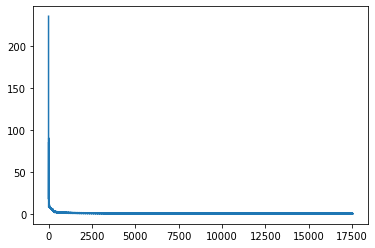

In [13]:
plt.plot(loss_list1)

### 模型准确率验证，结果分析
#### 当前配置下准确率60.58%，通过调整输入维度，隐藏层维度等超参数，变化不明显，最高的准确率约65%，且训练过程loss很快就下降到1以内，因此初步判断该模型结构能力有限，很难提升到更高的精度

In [16]:
bp_net1.eval()
test_num1 = len(data_set.test_labels)
test_input1 = torch.from_numpy(data_set.test_features).float()
test_labels1 = torch.from_numpy(data_set.test_labels).int()
# 预测
test_output1 = bp_net1(test_input1)
test_output1 = torch.squeeze(test_output1)    # test_output = torch.argmax(test_output, dim=1)
test_output1 = torch.round(test_output1)
equal_arr1 = torch.eq(test_output1, test_labels1)
right_count1 = torch.sum(equal_arr1)
acc1 = right_count1.numpy() / test_num1 * 100
print("测试样本总数:{},预测正确样本数:{},模型准确率:{}%".format(test_num1, right_count1, acc1))

测试样本总数:10000,预测正确样本数:6058,模型准确率:60.58%


## 模型2:10分类方式训练，交叉熵损失

In [17]:
# 输出维度
output_dim2 = 10
# 创建模型
bp_net2 = BP(input_dim, output_dim2, hidden_dim, True, 'sigmoid')
# 创建优化器
optimizer2 = optim.SGD(bp_net2.parameters(), lr=0.01, momentum=0.9) 
# 创建损失函数
criterion2 = nn.CrossEntropyLoss()

In [18]:
# 模型训练
loss_list2 = []
for i in range(epoch):
    for batch_data, batch_label in data_set.next():
        input = torch.from_numpy(batch_data).float()
        label = label = torch.from_numpy(batch_label).long()
        output = bp_net2(input)
        loss = criterion2(output, label) 
        loss_list2.append(loss)
        print("epoch={},loss={}".format(i,loss))
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

epoch=0,loss=3.514892578125
epoch=0,loss=3.332335948944092
epoch=0,loss=3.1951382160186768
epoch=0,loss=3.0309014320373535
epoch=0,loss=2.943554162979126
epoch=0,loss=2.878028631210327
epoch=0,loss=2.706099510192871
epoch=0,loss=2.6203396320343018
epoch=0,loss=2.5407369136810303
epoch=0,loss=2.518326997756958
epoch=0,loss=2.446883201599121
epoch=0,loss=2.3689935207366943
epoch=0,loss=2.3829596042633057
epoch=0,loss=2.4060637950897217
epoch=0,loss=2.3736438751220703
epoch=0,loss=2.377495050430298
epoch=0,loss=2.434946298599243
epoch=0,loss=2.439228057861328
epoch=0,loss=2.4313955307006836
epoch=0,loss=2.4491970539093018
epoch=0,loss=2.4921178817749023
epoch=0,loss=2.4866976737976074
epoch=0,loss=2.4316565990448
epoch=0,loss=2.4174623489379883
epoch=0,loss=2.390454053878784
epoch=0,loss=2.3535149097442627
epoch=0,loss=2.332430124282837
epoch=0,loss=2.304199457168579
epoch=0,loss=2.3122847080230713
epoch=0,loss=2.306151866912842
epoch=0,loss=2.308807849884033
epoch=0,loss=2.32229924201965

epoch=2,loss=2.294227361679077
epoch=2,loss=2.290356397628784
epoch=2,loss=2.300189733505249
epoch=2,loss=2.2900938987731934
epoch=2,loss=2.2892229557037354
epoch=2,loss=2.2915024757385254
epoch=2,loss=2.2879598140716553
epoch=2,loss=2.2851250171661377
epoch=2,loss=2.2951416969299316
epoch=2,loss=2.290422201156616
epoch=2,loss=2.29206919670105
epoch=2,loss=2.2914247512817383
epoch=2,loss=2.2963273525238037
epoch=2,loss=2.2814531326293945
epoch=2,loss=2.2890193462371826
epoch=2,loss=2.295815944671631
epoch=2,loss=2.2901482582092285
epoch=2,loss=2.293996572494507
epoch=2,loss=2.2949934005737305
epoch=2,loss=2.2915472984313965
epoch=2,loss=2.294677495956421
epoch=2,loss=2.289914131164551
epoch=2,loss=2.2987449169158936
epoch=2,loss=2.2939963340759277
epoch=2,loss=2.2812066078186035
epoch=2,loss=2.2909653186798096
epoch=2,loss=2.2896084785461426
epoch=2,loss=2.296111822128296
epoch=2,loss=2.2851431369781494
epoch=2,loss=2.299626350402832
epoch=2,loss=2.296433210372925
epoch=2,loss=2.288920

epoch=4,loss=2.2742743492126465
epoch=4,loss=2.2827038764953613
epoch=4,loss=2.2893805503845215
epoch=4,loss=2.2765674591064453
epoch=4,loss=2.279773473739624
epoch=4,loss=2.2710511684417725
epoch=4,loss=2.2732439041137695
epoch=4,loss=2.270433187484741
epoch=4,loss=2.2843456268310547
epoch=4,loss=2.273486852645874
epoch=4,loss=2.2812960147857666
epoch=4,loss=2.2839245796203613
epoch=4,loss=2.2713308334350586
epoch=4,loss=2.282716751098633
epoch=4,loss=2.277344226837158
epoch=4,loss=2.2778985500335693
epoch=4,loss=2.2766919136047363
epoch=4,loss=2.282320261001587
epoch=4,loss=2.2800652980804443
epoch=4,loss=2.2875492572784424
epoch=4,loss=2.280374050140381
epoch=4,loss=2.2719178199768066
epoch=4,loss=2.28765869140625
epoch=4,loss=2.2800750732421875
epoch=4,loss=2.2688088417053223
epoch=4,loss=2.2689390182495117
epoch=4,loss=2.2765188217163086
epoch=4,loss=2.2768843173980713
epoch=4,loss=2.270697832107544
epoch=4,loss=2.2764885425567627
epoch=4,loss=2.27116322517395
epoch=4,loss=2.27315

epoch=6,loss=2.255028009414673
epoch=6,loss=2.273244857788086
epoch=6,loss=2.2739055156707764
epoch=6,loss=2.2628023624420166
epoch=6,loss=2.257373809814453
epoch=6,loss=2.251586437225342
epoch=6,loss=2.254718065261841
epoch=6,loss=2.253460645675659
epoch=7,loss=2.266131639480591
epoch=7,loss=2.265756368637085
epoch=7,loss=2.2565698623657227
epoch=7,loss=2.256204843521118
epoch=7,loss=2.265997886657715
epoch=7,loss=2.2518205642700195
epoch=7,loss=2.2535579204559326
epoch=7,loss=2.252223491668701
epoch=7,loss=2.2507691383361816
epoch=7,loss=2.2689740657806396
epoch=7,loss=2.2621195316314697
epoch=7,loss=2.259434223175049
epoch=7,loss=2.2591636180877686
epoch=7,loss=2.266739845275879
epoch=7,loss=2.2767269611358643
epoch=7,loss=2.26943302154541
epoch=7,loss=2.258230686187744
epoch=7,loss=2.2633883953094482
epoch=7,loss=2.2500157356262207
epoch=7,loss=2.260657548904419
epoch=7,loss=2.2726621627807617
epoch=7,loss=2.2633767127990723
epoch=7,loss=2.2462708950042725
epoch=7,loss=2.2478215694

epoch=9,loss=2.2384283542633057
epoch=9,loss=2.253574848175049
epoch=9,loss=2.2415292263031006
epoch=9,loss=2.21915340423584
epoch=9,loss=2.2189648151397705
epoch=9,loss=2.2483599185943604
epoch=9,loss=2.239875555038452
epoch=9,loss=2.2458553314208984
epoch=9,loss=2.229860305786133
epoch=9,loss=2.251992702484131
epoch=9,loss=2.231025218963623
epoch=9,loss=2.233581304550171
epoch=9,loss=2.243793249130249
epoch=9,loss=2.242361068725586
epoch=9,loss=2.2456929683685303
epoch=9,loss=2.2422800064086914
epoch=9,loss=2.2068042755126953
epoch=9,loss=2.2353603839874268
epoch=9,loss=2.2447617053985596
epoch=9,loss=2.2291293144226074
epoch=9,loss=2.2473106384277344
epoch=9,loss=2.2316477298736572
epoch=9,loss=2.254110336303711
epoch=9,loss=2.219835042953491
epoch=9,loss=2.2674312591552734
epoch=9,loss=2.233937978744507
epoch=9,loss=2.2313644886016846
epoch=9,loss=2.2199337482452393
epoch=9,loss=2.232771158218384
epoch=9,loss=2.214104175567627
epoch=9,loss=2.2523396015167236
epoch=9,loss=2.24235558

epoch=11,loss=2.205472707748413
epoch=11,loss=2.1874094009399414
epoch=11,loss=2.2202811241149902
epoch=11,loss=2.211897611618042
epoch=11,loss=2.2186272144317627
epoch=11,loss=2.2120771408081055
epoch=11,loss=2.1835458278656006
epoch=11,loss=2.232686758041382
epoch=11,loss=2.198374032974243
epoch=11,loss=2.171218156814575
epoch=11,loss=2.184324264526367
epoch=11,loss=2.192598581314087
epoch=11,loss=2.1964848041534424
epoch=11,loss=2.171900510787964
epoch=11,loss=2.1984851360321045
epoch=11,loss=2.175384283065796
epoch=11,loss=2.171654224395752
epoch=11,loss=2.2253527641296387
epoch=11,loss=2.2159409523010254
epoch=11,loss=2.198071241378784
epoch=11,loss=2.183264970779419
epoch=11,loss=2.171212673187256
epoch=11,loss=2.170897960662842
epoch=11,loss=2.169734477996826
epoch=12,loss=2.201345682144165
epoch=12,loss=2.2047722339630127
epoch=12,loss=2.1782948970794678
epoch=12,loss=2.1761257648468018
epoch=12,loss=2.203904390335083
epoch=12,loss=2.177494525909424
epoch=12,loss=2.171575307846

epoch=14,loss=2.123457193374634
epoch=14,loss=2.1188907623291016
epoch=14,loss=2.1602582931518555
epoch=14,loss=2.1274302005767822
epoch=14,loss=2.1155192852020264
epoch=14,loss=2.114391326904297
epoch=14,loss=2.1375572681427
epoch=14,loss=2.185866355895996
epoch=14,loss=2.133779764175415
epoch=14,loss=2.1369760036468506
epoch=14,loss=2.1347110271453857
epoch=14,loss=2.1384594440460205
epoch=14,loss=2.1803667545318604
epoch=14,loss=2.146476984024048
epoch=14,loss=2.144850015640259
epoch=14,loss=2.154451847076416
epoch=14,loss=2.1394901275634766
epoch=14,loss=2.124396324157715
epoch=14,loss=2.1551947593688965
epoch=14,loss=2.1298046112060547
epoch=14,loss=2.1034207344055176
epoch=14,loss=2.0968472957611084
epoch=14,loss=2.1595418453216553
epoch=14,loss=2.1489081382751465
epoch=14,loss=2.1387858390808105
epoch=14,loss=2.15759015083313
epoch=14,loss=2.1857833862304688
epoch=14,loss=2.112586498260498
epoch=14,loss=2.1353068351745605
epoch=14,loss=2.1488287448883057
epoch=14,loss=2.14341187

epoch=16,loss=2.0373573303222656
epoch=16,loss=2.020002603530884
epoch=16,loss=2.0848114490509033
epoch=16,loss=2.0414087772369385
epoch=16,loss=2.017518997192383
epoch=16,loss=2.075514078140259
epoch=16,loss=2.072385787963867
epoch=16,loss=2.0402722358703613
epoch=16,loss=2.1292130947113037
epoch=16,loss=2.0612313747406006
epoch=16,loss=2.082307815551758
epoch=16,loss=2.0575737953186035
epoch=16,loss=2.0325798988342285
epoch=16,loss=1.981325387954712
epoch=16,loss=2.081605911254883
epoch=16,loss=2.1238625049591064
epoch=16,loss=2.0300934314727783
epoch=16,loss=2.0719099044799805
epoch=16,loss=2.0241825580596924
epoch=16,loss=1.9829673767089844
epoch=16,loss=1.9802035093307495
epoch=16,loss=2.092766284942627
epoch=16,loss=2.0014286041259766
epoch=16,loss=2.068084239959717
epoch=16,loss=2.0637526512145996
epoch=16,loss=2.0447542667388916
epoch=16,loss=2.060185432434082
epoch=16,loss=2.041625738143921
epoch=16,loss=2.0663836002349854
epoch=16,loss=2.0254106521606445
epoch=16,loss=2.09045

epoch=18,loss=2.0021941661834717
epoch=18,loss=2.0082240104675293
epoch=18,loss=2.027230739593506
epoch=18,loss=1.9140348434448242
epoch=18,loss=2.0260214805603027
epoch=18,loss=1.972365379333496
epoch=18,loss=1.9009523391723633
epoch=18,loss=1.962834119796753
epoch=18,loss=1.964066982269287
epoch=18,loss=1.9582163095474243
epoch=18,loss=1.8838075399398804
epoch=18,loss=1.9591455459594727
epoch=18,loss=1.91492760181427
epoch=18,loss=1.9059301614761353
epoch=18,loss=2.0468149185180664
epoch=18,loss=1.9760100841522217
epoch=18,loss=1.9565883874893188
epoch=18,loss=1.9399428367614746
epoch=18,loss=1.905132532119751
epoch=18,loss=1.8863940238952637
epoch=18,loss=1.887349247932434
epoch=19,loss=1.9402953386306763
epoch=19,loss=1.969657301902771
epoch=19,loss=1.9266912937164307
epoch=19,loss=1.9056522846221924
epoch=19,loss=1.984772801399231
epoch=19,loss=1.948693037033081
epoch=19,loss=1.9063727855682373
epoch=19,loss=1.93587327003479
epoch=19,loss=1.9797124862670898
epoch=19,loss=2.0526311

epoch=21,loss=1.9829990863800049
epoch=21,loss=1.8422795534133911
epoch=21,loss=1.8422678709030151
epoch=21,loss=1.8270361423492432
epoch=21,loss=1.798325538635254
epoch=21,loss=1.8959031105041504
epoch=21,loss=1.872330665588379
epoch=21,loss=1.8547533750534058
epoch=21,loss=1.8927586078643799
epoch=21,loss=1.8825315237045288
epoch=21,loss=1.7974847555160522
epoch=21,loss=1.8301889896392822
epoch=21,loss=1.8055506944656372
epoch=21,loss=1.7810041904449463
epoch=21,loss=1.800860047340393
epoch=21,loss=1.913378357887268
epoch=21,loss=1.8582069873809814
epoch=21,loss=1.8320187330245972
epoch=21,loss=1.9783387184143066
epoch=21,loss=1.9989697933197021
epoch=21,loss=1.7752878665924072
epoch=21,loss=1.8416486978530884
epoch=21,loss=1.8639450073242188
epoch=21,loss=1.8586567640304565
epoch=21,loss=1.8737719058990479
epoch=21,loss=1.8875236511230469
epoch=21,loss=1.7731331586837769
epoch=21,loss=1.8387516736984253
epoch=21,loss=1.8786073923110962
epoch=21,loss=1.8507930040359497
epoch=21,loss=

epoch=23,loss=1.7347848415374756
epoch=23,loss=1.6807761192321777
epoch=23,loss=1.7400165796279907
epoch=23,loss=1.7246956825256348
epoch=23,loss=1.7020612955093384
epoch=23,loss=1.7129487991333008
epoch=23,loss=1.8587607145309448
epoch=23,loss=1.7069048881530762
epoch=23,loss=1.7424017190933228
epoch=23,loss=1.7392560243606567
epoch=23,loss=1.6852360963821411
epoch=23,loss=1.760761022567749
epoch=23,loss=1.7474100589752197
epoch=23,loss=1.670200228691101
epoch=23,loss=1.7615824937820435
epoch=23,loss=1.7925552129745483
epoch=23,loss=1.802154779434204
epoch=23,loss=1.7629436254501343
epoch=23,loss=1.7271087169647217
epoch=23,loss=1.658780813217163
epoch=23,loss=1.7891643047332764
epoch=23,loss=1.7185736894607544
epoch=23,loss=1.677512288093567
epoch=23,loss=1.7605303525924683
epoch=23,loss=1.737478256225586
epoch=23,loss=1.7273576259613037
epoch=23,loss=1.849381923675537
epoch=23,loss=1.7261883020401
epoch=23,loss=1.7702407836914062
epoch=23,loss=1.7336454391479492
epoch=23,loss=1.6986

epoch=25,loss=1.6426705121994019
epoch=25,loss=1.6184550523757935
epoch=25,loss=1.545548439025879
epoch=25,loss=1.6734428405761719
epoch=25,loss=1.6070958375930786
epoch=25,loss=1.5778141021728516
epoch=25,loss=1.6450172662734985
epoch=25,loss=1.6356199979782104
epoch=25,loss=1.61161470413208
epoch=25,loss=1.7527347803115845
epoch=25,loss=1.6178983449935913
epoch=25,loss=1.6638824939727783
epoch=25,loss=1.6265708208084106
epoch=25,loss=1.5974292755126953
epoch=25,loss=1.5150872468948364
epoch=25,loss=1.6614713668823242
epoch=25,loss=1.7151472568511963
epoch=25,loss=1.5823886394500732
epoch=25,loss=1.6585932970046997
epoch=25,loss=1.5847145318984985
epoch=25,loss=1.518243670463562
epoch=25,loss=1.547789454460144
epoch=25,loss=1.6583613157272339
epoch=25,loss=1.540753960609436
epoch=25,loss=1.648264765739441
epoch=25,loss=1.666191816329956
epoch=25,loss=1.6256232261657715
epoch=25,loss=1.6339268684387207
epoch=25,loss=1.64242422580719
epoch=25,loss=1.6300387382507324
epoch=25,loss=1.5805

epoch=27,loss=1.498753309249878
epoch=27,loss=1.5806218385696411
epoch=27,loss=1.4967842102050781
epoch=27,loss=1.4413594007492065
epoch=27,loss=1.4651174545288086
epoch=27,loss=1.5728819370269775
epoch=27,loss=1.4524952173233032
epoch=27,loss=1.56965172290802
epoch=27,loss=1.5886781215667725
epoch=27,loss=1.5396065711975098
epoch=27,loss=1.5465832948684692
epoch=27,loss=1.5634560585021973
epoch=27,loss=1.5449342727661133
epoch=27,loss=1.486303687095642
epoch=27,loss=1.5706837177276611
epoch=27,loss=1.5758247375488281
epoch=27,loss=1.5475858449935913
epoch=27,loss=1.6187458038330078
epoch=27,loss=1.4230722188949585
epoch=27,loss=1.5757657289505005
epoch=27,loss=1.5184717178344727
epoch=27,loss=1.456770896911621
epoch=27,loss=1.5496751070022583
epoch=27,loss=1.5107884407043457
epoch=27,loss=1.4840834140777588
epoch=27,loss=1.3764268159866333
epoch=27,loss=1.543524980545044
epoch=27,loss=1.4488459825515747
epoch=27,loss=1.4393501281738281
epoch=27,loss=1.5526931285858154
epoch=27,loss=1.

epoch=30,loss=1.441278100013733
epoch=30,loss=1.4823964834213257
epoch=30,loss=1.4874013662338257
epoch=30,loss=1.3835506439208984
epoch=30,loss=1.385118007659912
epoch=30,loss=1.354328989982605
epoch=30,loss=1.3787602186203003
epoch=30,loss=1.3944575786590576
epoch=30,loss=1.5141654014587402
epoch=30,loss=1.4464884996414185
epoch=30,loss=1.4214568138122559
epoch=30,loss=1.5899473428726196
epoch=30,loss=1.6343430280685425
epoch=30,loss=1.3499895334243774
epoch=30,loss=1.4549880027770996
epoch=30,loss=1.4312357902526855
epoch=30,loss=1.457376480102539
epoch=30,loss=1.5031440258026123
epoch=30,loss=1.488439679145813
epoch=30,loss=1.351360559463501
epoch=30,loss=1.375889539718628
epoch=30,loss=1.4763373136520386
epoch=30,loss=1.4551234245300293
epoch=30,loss=1.5813682079315186
epoch=30,loss=1.3951631784439087
epoch=30,loss=1.4799625873565674
epoch=30,loss=1.3478883504867554
epoch=30,loss=1.5992350578308105
epoch=30,loss=1.4537979364395142
epoch=30,loss=1.4630149602890015
epoch=30,loss=1.4

epoch=32,loss=1.4011449813842773
epoch=32,loss=1.3603301048278809
epoch=32,loss=1.5003892183303833
epoch=32,loss=1.3286622762680054
epoch=32,loss=1.3919687271118164
epoch=32,loss=1.2657614946365356
epoch=32,loss=1.5234578847885132
epoch=32,loss=1.3734986782073975
epoch=32,loss=1.3845977783203125
epoch=32,loss=1.3229506015777588
epoch=32,loss=1.3437833786010742
epoch=32,loss=1.2997890710830688
epoch=32,loss=1.3248425722122192
epoch=32,loss=1.322975754737854
epoch=32,loss=1.3074674606323242
epoch=32,loss=1.3108391761779785
epoch=32,loss=1.480600118637085
epoch=32,loss=1.3053432703018188
epoch=32,loss=1.3389830589294434
epoch=32,loss=1.3754713535308838
epoch=32,loss=1.337581992149353
epoch=32,loss=1.3621572256088257
epoch=32,loss=1.3324708938598633
epoch=32,loss=1.299989104270935
epoch=32,loss=1.3789533376693726
epoch=32,loss=1.3937993049621582
epoch=32,loss=1.4363548755645752
epoch=32,loss=1.3369998931884766
epoch=32,loss=1.331634759902954
epoch=32,loss=1.2406420707702637
epoch=32,loss=1

epoch=34,loss=1.3092143535614014
epoch=34,loss=1.3099864721298218
epoch=34,loss=1.2741923332214355
epoch=34,loss=1.32061767578125
epoch=34,loss=1.168492078781128
epoch=34,loss=1.286352515220642
epoch=34,loss=1.241660714149475
epoch=34,loss=1.1925469636917114
epoch=34,loss=1.3050693273544312
epoch=34,loss=1.2067139148712158
epoch=34,loss=1.2128218412399292
epoch=34,loss=1.1121364831924438
epoch=34,loss=1.2589436769485474
epoch=34,loss=1.1801501512527466
epoch=34,loss=1.1643232107162476
epoch=34,loss=1.278570532798767
epoch=34,loss=1.231092929840088
epoch=34,loss=1.2302230596542358
epoch=34,loss=1.1718473434448242
epoch=34,loss=1.152045488357544
epoch=34,loss=1.121000051498413
epoch=34,loss=1.204742670059204
epoch=35,loss=1.2834937572479248
epoch=35,loss=1.2890214920043945
epoch=35,loss=1.23518705368042
epoch=35,loss=1.1531440019607544
epoch=35,loss=1.2213119268417358
epoch=35,loss=1.2538000345230103
epoch=35,loss=1.1528362035751343
epoch=35,loss=1.2547470331192017
epoch=35,loss=1.227194

epoch=36,loss=1.0870342254638672
epoch=36,loss=1.047829031944275
epoch=36,loss=1.14142644405365
epoch=37,loss=1.218827247619629
epoch=37,loss=1.2302688360214233
epoch=37,loss=1.1801246404647827
epoch=37,loss=1.0901557207107544
epoch=37,loss=1.156624674797058
epoch=37,loss=1.188109040260315
epoch=37,loss=1.0949301719665527
epoch=37,loss=1.1879478693008423
epoch=37,loss=1.1607980728149414
epoch=37,loss=1.2997167110443115
epoch=37,loss=1.1939213275909424
epoch=37,loss=1.1790422201156616
epoch=37,loss=1.1411212682724
epoch=37,loss=1.1379059553146362
epoch=37,loss=1.249559760093689
epoch=37,loss=1.1705809831619263
epoch=37,loss=1.2165011167526245
epoch=37,loss=1.2313538789749146
epoch=37,loss=1.2634402513504028
epoch=37,loss=1.093342900276184
epoch=37,loss=1.0993410348892212
epoch=37,loss=1.1054340600967407
epoch=37,loss=1.1290526390075684
epoch=37,loss=1.156682014465332
epoch=37,loss=1.2679569721221924
epoch=37,loss=1.2125686407089233
epoch=37,loss=1.1731185913085938
epoch=37,loss=1.354465

epoch=39,loss=1.1163579225540161
epoch=39,loss=1.0856304168701172
epoch=39,loss=1.1628763675689697
epoch=39,loss=1.1828259229660034
epoch=39,loss=1.2100497484207153
epoch=39,loss=1.0903537273406982
epoch=39,loss=1.1024260520935059
epoch=39,loss=0.9931463599205017
epoch=39,loss=1.1929845809936523
epoch=39,loss=1.0978749990463257
epoch=39,loss=1.06902277469635
epoch=39,loss=1.1159502267837524
epoch=39,loss=1.0907536745071411
epoch=39,loss=1.1215741634368896
epoch=39,loss=1.2618680000305176
epoch=39,loss=1.0988761186599731
epoch=39,loss=1.1524351835250854
epoch=39,loss=1.1043298244476318
epoch=39,loss=1.1166239976882935
epoch=39,loss=1.0353803634643555
epoch=39,loss=1.1109318733215332
epoch=39,loss=1.1884872913360596
epoch=39,loss=1.075262427330017
epoch=39,loss=1.1906288862228394
epoch=39,loss=1.1222867965698242
epoch=39,loss=1.0712275505065918
epoch=39,loss=1.066224217414856
epoch=39,loss=1.1566059589385986
epoch=39,loss=1.043089747428894
epoch=39,loss=1.1300314664840698
epoch=39,loss=1

epoch=41,loss=1.1369473934173584
epoch=41,loss=0.9725876450538635
epoch=41,loss=1.1091195344924927
epoch=41,loss=1.0642763376235962
epoch=41,loss=1.0051305294036865
epoch=41,loss=1.1306756734848022
epoch=41,loss=1.0078833103179932
epoch=41,loss=1.003608226776123
epoch=41,loss=0.923801064491272
epoch=41,loss=1.085400104522705
epoch=41,loss=0.9824120402336121
epoch=41,loss=0.968326985836029
epoch=41,loss=1.1067185401916504
epoch=41,loss=1.0434921979904175
epoch=41,loss=1.0520727634429932
epoch=41,loss=0.9572222232818604
epoch=41,loss=0.9554868340492249
epoch=41,loss=0.9085142612457275
epoch=41,loss=1.0083321332931519
epoch=42,loss=1.0790473222732544
epoch=42,loss=1.0923265218734741
epoch=42,loss=1.0656410455703735
epoch=42,loss=0.9629737734794617
epoch=42,loss=1.017838716506958
epoch=42,loss=1.0607287883758545
epoch=42,loss=0.9681612849235535
epoch=42,loss=1.0567570924758911
epoch=42,loss=1.0275968313217163
epoch=42,loss=1.182701587677002
epoch=42,loss=1.0776854753494263
epoch=42,loss=1.

epoch=44,loss=1.2227338552474976
epoch=44,loss=1.2421138286590576
epoch=44,loss=0.9183193445205688
epoch=44,loss=1.034287452697754
epoch=44,loss=1.0131185054779053
epoch=44,loss=1.0447335243225098
epoch=44,loss=1.074995756149292
epoch=44,loss=1.1054362058639526
epoch=44,loss=0.9393532872200012
epoch=44,loss=0.9708524942398071
epoch=44,loss=1.0708180665969849
epoch=44,loss=1.0066512823104858
epoch=44,loss=1.158213496208191
epoch=44,loss=0.9903110861778259
epoch=44,loss=1.0342316627502441
epoch=44,loss=0.9000652432441711
epoch=44,loss=1.1342347860336304
epoch=44,loss=1.052613615989685
epoch=44,loss=1.0009124279022217
epoch=44,loss=1.0221080780029297
epoch=44,loss=0.9600624442100525
epoch=44,loss=0.967972457408905
epoch=44,loss=0.962887167930603
epoch=44,loss=0.9496946930885315
epoch=44,loss=0.9859175682067871
epoch=44,loss=0.9866807460784912
epoch=44,loss=1.116866946220398
epoch=44,loss=0.9562405943870544
epoch=44,loss=1.0501456260681152
epoch=44,loss=1.0459609031677246
epoch=44,loss=1.0

epoch=46,loss=1.1321028470993042
epoch=46,loss=0.9302045106887817
epoch=46,loss=1.0166443586349487
epoch=46,loss=0.9585546851158142
epoch=46,loss=0.961353063583374
epoch=46,loss=0.886445939540863
epoch=46,loss=0.9688758850097656
epoch=46,loss=1.0476853847503662
epoch=46,loss=0.9326316714286804
epoch=46,loss=1.0504939556121826
epoch=46,loss=0.9867212176322937
epoch=46,loss=0.9102055430412292
epoch=46,loss=0.9090702533721924
epoch=46,loss=1.002837061882019
epoch=46,loss=0.901273250579834
epoch=46,loss=0.9933620095252991
epoch=46,loss=1.0177345275878906
epoch=46,loss=0.9966849684715271
epoch=46,loss=0.9663714170455933
epoch=46,loss=1.0445395708084106
epoch=46,loss=0.9494249224662781
epoch=46,loss=0.9442468285560608
epoch=46,loss=1.0246386528015137
epoch=46,loss=1.021190881729126
epoch=46,loss=0.9755236506462097
epoch=46,loss=1.054212212562561
epoch=46,loss=0.8738994598388672
epoch=46,loss=1.0157630443572998
epoch=46,loss=0.9748599529266357
epoch=46,loss=0.9129050970077515
epoch=46,loss=1.

epoch=49,loss=0.8897120952606201
epoch=49,loss=1.0628626346588135
epoch=49,loss=0.9548185467720032
epoch=49,loss=0.9105342030525208
epoch=49,loss=0.903337299823761
epoch=49,loss=0.9463907480239868
epoch=49,loss=0.9967848658561707
epoch=49,loss=0.8985213041305542
epoch=49,loss=0.9735563397407532
epoch=49,loss=0.9453789591789246
epoch=49,loss=1.0206886529922485
epoch=49,loss=0.8514128923416138
epoch=49,loss=0.790375828742981
epoch=49,loss=0.8552643656730652
epoch=49,loss=0.8957195281982422
epoch=49,loss=0.878706693649292
epoch=49,loss=0.999678909778595
epoch=49,loss=0.9798564314842224
epoch=49,loss=0.9034538269042969
epoch=49,loss=1.1339869499206543
epoch=49,loss=1.1490498781204224
epoch=49,loss=0.8149034380912781
epoch=49,loss=0.9618654251098633
epoch=49,loss=0.9142146110534668
epoch=49,loss=0.9641321897506714
epoch=49,loss=0.9867801070213318
epoch=49,loss=1.0069682598114014
epoch=49,loss=0.8455692529678345
epoch=49,loss=0.8804178833961487
epoch=49,loss=0.9779450297355652
epoch=49,loss=

epoch=51,loss=0.9029317498207092
epoch=51,loss=0.8280923962593079
epoch=51,loss=0.8592274188995361
epoch=51,loss=0.8380690217018127
epoch=51,loss=0.8307285904884338
epoch=51,loss=0.8696941137313843
epoch=51,loss=0.8758017420768738
epoch=51,loss=1.0076861381530762
epoch=51,loss=0.8338937163352966
epoch=51,loss=0.9465097784996033
epoch=51,loss=0.9179056286811829
epoch=51,loss=0.9222710728645325
epoch=51,loss=0.9356045722961426
epoch=51,loss=0.8900048136711121
epoch=51,loss=0.8676773905754089
epoch=51,loss=0.9332337379455566
epoch=51,loss=0.931251585483551
epoch=51,loss=0.981398344039917
epoch=51,loss=0.8480542302131653
epoch=51,loss=0.8573533892631531
epoch=51,loss=0.7585841417312622
epoch=51,loss=0.9907264709472656
epoch=51,loss=0.8599759340286255
epoch=51,loss=0.8318172097206116
epoch=51,loss=0.9103702902793884
epoch=51,loss=0.8620980978012085
epoch=51,loss=0.894467830657959
epoch=51,loss=1.0599724054336548
epoch=51,loss=0.8439077138900757
epoch=51,loss=0.9450316429138184
epoch=51,loss

epoch=53,loss=0.7781148552894592
epoch=53,loss=0.8642697334289551
epoch=53,loss=0.9290046095848083
epoch=53,loss=0.8212423324584961
epoch=53,loss=0.938601553440094
epoch=53,loss=0.8885625004768372
epoch=53,loss=0.782828152179718
epoch=53,loss=0.788611888885498
epoch=53,loss=0.8741573095321655
epoch=53,loss=0.800281286239624
epoch=53,loss=0.8776748776435852
epoch=53,loss=0.9082910418510437
epoch=53,loss=0.8842151165008545
epoch=53,loss=0.8646063804626465
epoch=53,loss=0.9414535760879517
epoch=53,loss=0.8294677734375
epoch=53,loss=0.852811336517334
epoch=53,loss=0.9145960807800293
epoch=53,loss=0.9245406985282898
epoch=53,loss=0.8698656558990479
epoch=53,loss=0.9613803029060364
epoch=53,loss=0.7661496996879578
epoch=53,loss=0.9114803671836853
epoch=53,loss=0.8701949715614319
epoch=53,loss=0.8079464435577393
epoch=53,loss=0.9342043399810791
epoch=53,loss=0.8065889477729797
epoch=53,loss=0.8088617324829102
epoch=53,loss=0.7343505620956421
epoch=53,loss=0.894593358039856
epoch=53,loss=0.776

epoch=56,loss=0.8477651476860046
epoch=56,loss=0.8021377921104431
epoch=56,loss=0.7958937287330627
epoch=56,loss=0.8667029738426208
epoch=56,loss=0.8913227319717407
epoch=56,loss=0.7995138168334961
epoch=56,loss=0.8796294927597046
epoch=56,loss=0.8428552746772766
epoch=56,loss=0.9292190670967102
epoch=56,loss=0.7594092488288879
epoch=56,loss=0.6746287941932678
epoch=56,loss=0.7534640431404114
epoch=56,loss=0.805890679359436
epoch=56,loss=0.7475729584693909
epoch=56,loss=0.8850359916687012
epoch=56,loss=0.8597181439399719
epoch=56,loss=0.7995434999465942
epoch=56,loss=1.0144168138504028
epoch=56,loss=1.0234160423278809
epoch=56,loss=0.7086079716682434
epoch=56,loss=0.8674068450927734
epoch=56,loss=0.8031474947929382
epoch=56,loss=0.856283962726593
epoch=56,loss=0.8920125961303711
epoch=56,loss=0.8822147846221924
epoch=56,loss=0.7444446086883545
epoch=56,loss=0.7792552709579468
epoch=56,loss=0.8699045181274414
epoch=56,loss=0.8112246990203857
epoch=56,loss=0.9380173683166504
epoch=56,los

epoch=58,loss=0.8215364813804626
epoch=58,loss=0.8180956840515137
epoch=58,loss=0.7840481996536255
epoch=58,loss=0.7944414019584656
epoch=58,loss=0.823410153388977
epoch=58,loss=0.8131850957870483
epoch=58,loss=0.8732502460479736
epoch=58,loss=0.7333397269248962
epoch=58,loss=0.7360793352127075
epoch=58,loss=0.650689959526062
epoch=58,loss=0.878966748714447
epoch=58,loss=0.7568190693855286
epoch=58,loss=0.7306228280067444
epoch=58,loss=0.8169460892677307
epoch=58,loss=0.7420061230659485
epoch=58,loss=0.8046569228172302
epoch=58,loss=0.9609841108322144
epoch=58,loss=0.7433744072914124
epoch=58,loss=0.8432973623275757
epoch=58,loss=0.7508631944656372
epoch=58,loss=0.7860265374183655
epoch=58,loss=0.6872454285621643
epoch=58,loss=0.774050772190094
epoch=58,loss=0.8635143041610718
epoch=58,loss=0.7410880923271179
epoch=58,loss=0.857276201248169
epoch=58,loss=0.8099352121353149
epoch=58,loss=0.709971010684967
epoch=58,loss=0.7133015990257263
epoch=58,loss=0.798067569732666
epoch=58,loss=0.7

epoch=60,loss=0.6795769333839417
epoch=60,loss=0.6829926371574402
epoch=60,loss=0.753909707069397
epoch=60,loss=0.6979573965072632
epoch=60,loss=0.7935642600059509
epoch=60,loss=0.8238812685012817
epoch=60,loss=0.7773520946502686
epoch=60,loss=0.7640107274055481
epoch=60,loss=0.840820848941803
epoch=60,loss=0.7070634365081787
epoch=60,loss=0.7421402335166931
epoch=60,loss=0.7929997444152832
epoch=60,loss=0.8357871174812317
epoch=60,loss=0.7693511843681335
epoch=60,loss=0.8450325727462769
epoch=60,loss=0.662192165851593
epoch=60,loss=0.8041688203811646
epoch=60,loss=0.7410409450531006
epoch=60,loss=0.6827490329742432
epoch=60,loss=0.8273835182189941
epoch=60,loss=0.701019823551178
epoch=60,loss=0.6899945139884949
epoch=60,loss=0.6430841684341431
epoch=60,loss=0.7906907796859741
epoch=60,loss=0.691191554069519
epoch=60,loss=0.5965313911437988
epoch=60,loss=0.7874278426170349
epoch=60,loss=0.749292254447937
epoch=60,loss=0.7173418998718262
epoch=60,loss=0.6082993745803833
epoch=60,loss=0.

epoch=62,loss=0.5415908694267273
epoch=62,loss=0.6328802704811096
epoch=63,loss=0.722611129283905
epoch=63,loss=0.7292006611824036
epoch=63,loss=0.7435482144355774
epoch=63,loss=0.5885007381439209
epoch=63,loss=0.6012611389160156
epoch=63,loss=0.7040753960609436
epoch=63,loss=0.6185855865478516
epoch=63,loss=0.6708106994628906
epoch=63,loss=0.6850757002830505
epoch=63,loss=0.7882887125015259
epoch=63,loss=0.713755190372467
epoch=63,loss=0.6709521412849426
epoch=63,loss=0.6572645306587219
epoch=63,loss=0.7567161917686462
epoch=63,loss=0.7518390417098999
epoch=63,loss=0.6787897944450378
epoch=63,loss=0.7386412620544434
epoch=63,loss=0.7370362281799316
epoch=63,loss=0.8069331645965576
epoch=63,loss=0.6364207863807678
epoch=63,loss=0.5771830081939697
epoch=63,loss=0.6458675265312195
epoch=63,loss=0.7092940807342529
epoch=63,loss=0.6231924891471863
epoch=63,loss=0.7623036503791809
epoch=63,loss=0.7340773940086365
epoch=63,loss=0.6615797877311707
epoch=63,loss=0.8567007184028625
epoch=63,los

epoch=65,loss=0.7324281930923462
epoch=65,loss=0.5942375659942627
epoch=65,loss=0.5997211933135986
epoch=65,loss=0.7145606875419617
epoch=65,loss=0.6333798170089722
epoch=65,loss=0.7472798824310303
epoch=65,loss=0.6779705882072449
epoch=65,loss=0.6773028373718262
epoch=65,loss=0.5523917078971863
epoch=65,loss=0.7158207893371582
epoch=65,loss=0.6842766404151917
epoch=65,loss=0.6039349436759949
epoch=65,loss=0.6833464503288269
epoch=65,loss=0.6094655990600586
epoch=65,loss=0.686183750629425
epoch=65,loss=0.6277115941047668
epoch=65,loss=0.6421440839767456
epoch=65,loss=0.643058180809021
epoch=65,loss=0.6624327898025513
epoch=65,loss=0.7453500032424927
epoch=65,loss=0.6073359251022339
epoch=65,loss=0.6870608925819397
epoch=65,loss=0.6684194803237915
epoch=65,loss=0.7166716456413269
epoch=65,loss=0.6999607682228088
epoch=65,loss=0.6669246554374695
epoch=65,loss=0.688632607460022
epoch=65,loss=0.7423418164253235
epoch=65,loss=0.697644829750061
epoch=65,loss=0.7444481253623962
epoch=65,loss=

epoch=67,loss=0.7177191972732544
epoch=67,loss=0.625738263130188
epoch=67,loss=0.6131024360656738
epoch=67,loss=0.6424083113670349
epoch=67,loss=0.5930704474449158
epoch=67,loss=0.6780304312705994
epoch=67,loss=0.8142032027244568
epoch=67,loss=0.6052623391151428
epoch=67,loss=0.6726942658424377
epoch=67,loss=0.6123189330101013
epoch=67,loss=0.6857063174247742
epoch=67,loss=0.5526170134544373
epoch=67,loss=0.6215515732765198
epoch=67,loss=0.7237288355827332
epoch=67,loss=0.5942909717559814
epoch=67,loss=0.7077787518501282
epoch=67,loss=0.678554892539978
epoch=67,loss=0.5913439393043518
epoch=67,loss=0.5829401016235352
epoch=67,loss=0.6536943912506104
epoch=67,loss=0.5800899267196655
epoch=67,loss=0.6721012592315674
epoch=67,loss=0.7050154805183411
epoch=67,loss=0.6808647513389587
epoch=67,loss=0.6601963639259338
epoch=67,loss=0.7143058776855469
epoch=67,loss=0.5975908637046814
epoch=67,loss=0.6244215965270996
epoch=67,loss=0.6765992045402527
epoch=67,loss=0.729804515838623
epoch=67,loss

epoch=70,loss=0.5727716684341431
epoch=70,loss=0.6010093688964844
epoch=70,loss=0.6692626476287842
epoch=70,loss=0.6325855851173401
epoch=70,loss=0.580172598361969
epoch=70,loss=0.5669772624969482
epoch=70,loss=0.6776823997497559
epoch=70,loss=0.6640080809593201
epoch=70,loss=0.5989658236503601
epoch=70,loss=0.6450765132904053
epoch=70,loss=0.6655824184417725
epoch=70,loss=0.6995053291320801
epoch=70,loss=0.5504028797149658
epoch=70,loss=0.49637678265571594
epoch=70,loss=0.5650920867919922
epoch=70,loss=0.616245448589325
epoch=70,loss=0.5403162240982056
epoch=70,loss=0.6746262907981873
epoch=70,loss=0.6543756723403931
epoch=70,loss=0.5650705099105835
epoch=70,loss=0.7540845274925232
epoch=70,loss=0.8140712976455688
epoch=70,loss=0.5189269185066223
epoch=70,loss=0.6389274001121521
epoch=70,loss=0.6155591011047363
epoch=70,loss=0.6675875782966614
epoch=70,loss=0.66283118724823
epoch=70,loss=0.6720243096351624
epoch=70,loss=0.5441412925720215
epoch=70,loss=0.5416126847267151
epoch=70,loss

epoch=72,loss=0.5272117853164673
epoch=72,loss=0.6070055961608887
epoch=72,loss=0.5419721007347107
epoch=72,loss=0.617134690284729
epoch=72,loss=0.5447678565979004
epoch=72,loss=0.5680607557296753
epoch=72,loss=0.5769628882408142
epoch=72,loss=0.584096372127533
epoch=72,loss=0.6482789516448975
epoch=72,loss=0.5252958536148071
epoch=72,loss=0.6177894473075867
epoch=72,loss=0.6002926230430603
epoch=72,loss=0.6536633372306824
epoch=72,loss=0.6305842995643616
epoch=72,loss=0.585292398929596
epoch=72,loss=0.6090270280838013
epoch=72,loss=0.6860274076461792
epoch=72,loss=0.6087867617607117
epoch=72,loss=0.6694779396057129
epoch=72,loss=0.5599105358123779
epoch=72,loss=0.5477192997932434
epoch=72,loss=0.45031923055648804
epoch=72,loss=0.650632917881012
epoch=72,loss=0.5732027888298035
epoch=72,loss=0.5664297342300415
epoch=72,loss=0.587166428565979
epoch=72,loss=0.5411511659622192
epoch=72,loss=0.6309165358543396
epoch=72,loss=0.7652619481086731
epoch=72,loss=0.547239363193512
epoch=72,loss=0

epoch=74,loss=0.6054000854492188
epoch=74,loss=0.5884600877761841
epoch=74,loss=0.6228466629981995
epoch=74,loss=0.5223845839500427
epoch=74,loss=0.5514117479324341
epoch=74,loss=0.6122488379478455
epoch=74,loss=0.6460404992103577
epoch=74,loss=0.5778420567512512
epoch=74,loss=0.6677345037460327
epoch=74,loss=0.4866320490837097
epoch=74,loss=0.5959538221359253
epoch=74,loss=0.5375837683677673
epoch=74,loss=0.4997236728668213
epoch=74,loss=0.6874062418937683
epoch=74,loss=0.5328108668327332
epoch=74,loss=0.5281771421432495
epoch=74,loss=0.48809143900871277
epoch=74,loss=0.6071116328239441
epoch=74,loss=0.5116233825683594
epoch=74,loss=0.4406295418739319
epoch=74,loss=0.5707954168319702
epoch=74,loss=0.5661088228225708
epoch=74,loss=0.5350334644317627
epoch=74,loss=0.44013088941574097
epoch=74,loss=0.4595256745815277
epoch=74,loss=0.3898013234138489
epoch=74,loss=0.47654828429222107
epoch=75,loss=0.5833392143249512
epoch=75,loss=0.6221898794174194
epoch=75,loss=0.6206700801849365
epoch=7

epoch=77,loss=0.44845476746559143
epoch=77,loss=0.5026928782463074
epoch=77,loss=0.5250089168548584
epoch=77,loss=0.5961951017379761
epoch=77,loss=0.5497353076934814
epoch=77,loss=0.5092611312866211
epoch=77,loss=0.48819804191589355
epoch=77,loss=0.6089937090873718
epoch=77,loss=0.5969616770744324
epoch=77,loss=0.529974639415741
epoch=77,loss=0.5815299153327942
epoch=77,loss=0.6017072796821594
epoch=77,loss=0.6170104742050171
epoch=77,loss=0.4805980920791626
epoch=77,loss=0.4341897666454315
epoch=77,loss=0.49453631043434143
epoch=77,loss=0.5440394878387451
epoch=77,loss=0.47768303751945496
epoch=77,loss=0.6042793989181519
epoch=77,loss=0.5996520519256592
epoch=77,loss=0.5002502799034119
epoch=77,loss=0.6778085231781006
epoch=77,loss=0.7435044646263123
epoch=77,loss=0.4741770327091217
epoch=77,loss=0.5616965889930725
epoch=77,loss=0.5621176362037659
epoch=77,loss=0.5931105017662048
epoch=77,loss=0.5851242542266846
epoch=77,loss=0.6015533208847046
epoch=77,loss=0.4939238727092743
epoch=7

epoch=79,loss=0.4613805413246155
epoch=79,loss=0.5888373851776123
epoch=79,loss=0.5827271342277527
epoch=79,loss=0.48563432693481445
epoch=79,loss=0.6591305136680603
epoch=79,loss=0.7240952253341675
epoch=79,loss=0.4618925154209137
epoch=79,loss=0.5436046719551086
epoch=79,loss=0.5479421019554138
epoch=79,loss=0.5758838057518005
epoch=79,loss=0.5635772943496704
epoch=79,loss=0.5847041010856628
epoch=79,loss=0.47916799783706665
epoch=79,loss=0.4578874409198761
epoch=79,loss=0.5549089908599854
epoch=79,loss=0.4632059931755066
epoch=79,loss=0.5899698734283447
epoch=79,loss=0.5563676953315735
epoch=79,loss=0.5282718539237976
epoch=79,loss=0.41070112586021423
epoch=79,loss=0.5431759357452393
epoch=79,loss=0.5395123362541199
epoch=79,loss=0.47578632831573486
epoch=79,loss=0.5422107577323914
epoch=79,loss=0.48843270540237427
epoch=79,loss=0.5657573342323303
epoch=79,loss=0.47408631443977356
epoch=79,loss=0.4952555000782013
epoch=79,loss=0.5207312703132629
epoch=79,loss=0.5263302326202393
epoc

epoch=81,loss=0.619296133518219
epoch=81,loss=0.5199252367019653
epoch=81,loss=0.5802710652351379
epoch=81,loss=0.48156875371932983
epoch=81,loss=0.47366562485694885
epoch=81,loss=0.36914563179016113
epoch=81,loss=0.5563958287239075
epoch=81,loss=0.5014399886131287
epoch=81,loss=0.47528764605522156
epoch=81,loss=0.5175764560699463
epoch=81,loss=0.4717116057872772
epoch=81,loss=0.5658592581748962
epoch=81,loss=0.6827937364578247
epoch=81,loss=0.46152669191360474
epoch=81,loss=0.5258992314338684
epoch=81,loss=0.48662179708480835
epoch=81,loss=0.5640841722488403
epoch=81,loss=0.42715325951576233
epoch=81,loss=0.4905540645122528
epoch=81,loss=0.571747362613678
epoch=81,loss=0.47435757517814636
epoch=81,loss=0.5769446492195129
epoch=81,loss=0.531757652759552
epoch=81,loss=0.4630550444126129
epoch=81,loss=0.45470401644706726
epoch=81,loss=0.5607815980911255
epoch=81,loss=0.4648524224758148
epoch=81,loss=0.4987751245498657
epoch=81,loss=0.5668297410011292
epoch=81,loss=0.5368269681930542
epoc

epoch=83,loss=0.5333224534988403
epoch=83,loss=0.568411111831665
epoch=83,loss=0.5037218332290649
epoch=83,loss=0.6022861003875732
epoch=83,loss=0.42519426345825195
epoch=83,loss=0.504763126373291
epoch=83,loss=0.4789629280567169
epoch=83,loss=0.4324972629547119
epoch=83,loss=0.6128153204917908
epoch=83,loss=0.4651654064655304
epoch=83,loss=0.4604935646057129
epoch=83,loss=0.4162346422672272
epoch=83,loss=0.5299018025398254
epoch=83,loss=0.4441821277141571
epoch=83,loss=0.3962043821811676
epoch=83,loss=0.47752177715301514
epoch=83,loss=0.4828179180622101
epoch=83,loss=0.45849254727363586
epoch=83,loss=0.3731520175933838
epoch=83,loss=0.38350215554237366
epoch=83,loss=0.3124403953552246
epoch=83,loss=0.39541444182395935
epoch=84,loss=0.48532769083976746
epoch=84,loss=0.5543195009231567
epoch=84,loss=0.564235508441925
epoch=84,loss=0.38155826926231384
epoch=84,loss=0.37234634160995483
epoch=84,loss=0.4647058844566345
epoch=84,loss=0.39032065868377686
epoch=84,loss=0.441427618265152
epoch

epoch=86,loss=0.5372943878173828
epoch=86,loss=0.5237998962402344
epoch=86,loss=0.4136772155761719
epoch=86,loss=0.36962905526161194
epoch=86,loss=0.41849008202552795
epoch=86,loss=0.48536255955696106
epoch=86,loss=0.41916048526763916
epoch=86,loss=0.5506290197372437
epoch=86,loss=0.5347962975502014
epoch=86,loss=0.4442921280860901
epoch=86,loss=0.5956088304519653
epoch=86,loss=0.6688029766082764
epoch=86,loss=0.42184144258499146
epoch=86,loss=0.4883727729320526
epoch=86,loss=0.49522945284843445
epoch=86,loss=0.5269884467124939
epoch=86,loss=0.49809494614601135
epoch=86,loss=0.5345360040664673
epoch=86,loss=0.432600736618042
epoch=86,loss=0.4063541293144226
epoch=86,loss=0.4951738715171814
epoch=86,loss=0.40702933073043823
epoch=86,loss=0.5336655974388123
epoch=86,loss=0.5112537741661072
epoch=86,loss=0.46799176931381226
epoch=86,loss=0.3583243489265442
epoch=86,loss=0.48580998182296753
epoch=86,loss=0.4911547899246216
epoch=86,loss=0.4286896884441376
epoch=86,loss=0.4903706908226013
e

epoch=88,loss=0.4585927724838257
epoch=88,loss=0.459888756275177
epoch=88,loss=0.5067651867866516
epoch=88,loss=0.40082305669784546
epoch=88,loss=0.49625757336616516
epoch=88,loss=0.4623167812824249
epoch=88,loss=0.5083431601524353
epoch=88,loss=0.513667106628418
epoch=88,loss=0.4738057553768158
epoch=88,loss=0.5014227628707886
epoch=88,loss=0.5747255682945251
epoch=88,loss=0.4792035222053528
epoch=88,loss=0.5273346304893494
epoch=88,loss=0.4344957172870636
epoch=88,loss=0.43341565132141113
epoch=88,loss=0.3156183958053589
epoch=88,loss=0.5090277791023254
epoch=88,loss=0.45663633942604065
epoch=88,loss=0.41623759269714355
epoch=88,loss=0.46625664830207825
epoch=88,loss=0.4433439373970032
epoch=88,loss=0.5230693817138672
epoch=88,loss=0.6281729936599731
epoch=88,loss=0.41216161847114563
epoch=88,loss=0.47487106919288635
epoch=88,loss=0.4447647035121918
epoch=88,loss=0.5096933245658875
epoch=88,loss=0.388884574174881
epoch=88,loss=0.4514271020889282
epoch=88,loss=0.5061616897583008
epoch

epoch=90,loss=0.44299906492233276
epoch=90,loss=0.48444488644599915
epoch=90,loss=0.5314429402351379
epoch=90,loss=0.45757967233657837
epoch=90,loss=0.5630006790161133
epoch=90,loss=0.3963973820209503
epoch=90,loss=0.4452798366546631
epoch=90,loss=0.4446868300437927
epoch=90,loss=0.39451491832733154
epoch=90,loss=0.5707700848579407
epoch=90,loss=0.4381254315376282
epoch=90,loss=0.42795783281326294
epoch=90,loss=0.3709619641304016
epoch=90,loss=0.488646924495697
epoch=90,loss=0.4059712588787079
epoch=90,loss=0.3720003068447113
epoch=90,loss=0.42718541622161865
epoch=90,loss=0.43127065896987915
epoch=90,loss=0.4088207483291626
epoch=90,loss=0.33624884486198425
epoch=90,loss=0.3369899094104767
epoch=90,loss=0.27838099002838135
epoch=90,loss=0.3534006178379059
epoch=91,loss=0.436557412147522
epoch=91,loss=0.5182479023933411
epoch=91,loss=0.5328649878501892
epoch=91,loss=0.3460038900375366
epoch=91,loss=0.3306932747364044
epoch=91,loss=0.42119285464286804
epoch=91,loss=0.3522549271583557
ep

epoch=93,loss=0.5013595819473267
epoch=93,loss=0.4815751016139984
epoch=93,loss=0.3808043301105499
epoch=93,loss=0.325140118598938
epoch=93,loss=0.3793734908103943
epoch=93,loss=0.44637611508369446
epoch=93,loss=0.38960757851600647
epoch=93,loss=0.5262620449066162
epoch=93,loss=0.4924089312553406
epoch=93,loss=0.4078103005886078
epoch=93,loss=0.5443050265312195
epoch=93,loss=0.6055026054382324
epoch=93,loss=0.38731205463409424
epoch=93,loss=0.44209936261177063
epoch=93,loss=0.45353808999061584
epoch=93,loss=0.4899561107158661
epoch=93,loss=0.4475984275341034
epoch=93,loss=0.4959409832954407
epoch=93,loss=0.39146852493286133
epoch=93,loss=0.3699150085449219
epoch=93,loss=0.4478326439857483
epoch=93,loss=0.37142616510391235
epoch=93,loss=0.48237499594688416
epoch=93,loss=0.47463706135749817
epoch=93,loss=0.43040940165519714
epoch=93,loss=0.32185837626457214
epoch=93,loss=0.4452667236328125
epoch=93,loss=0.446259468793869
epoch=93,loss=0.3834567666053772
epoch=93,loss=0.44845056533813477


epoch=95,loss=0.42398759722709656
epoch=95,loss=0.46496468782424927
epoch=95,loss=0.4741835594177246
epoch=95,loss=0.43335023522377014
epoch=95,loss=0.46730512380599976
epoch=95,loss=0.5412936806678772
epoch=95,loss=0.44805461168289185
epoch=95,loss=0.489848256111145
epoch=95,loss=0.39509329199790955
epoch=95,loss=0.40463343262672424
epoch=95,loss=0.2796993553638458
epoch=95,loss=0.47250717878341675
epoch=95,loss=0.41884833574295044
epoch=95,loss=0.37024977803230286
epoch=95,loss=0.4231894016265869
epoch=95,loss=0.42228734493255615
epoch=95,loss=0.49056175351142883
epoch=95,loss=0.5806960463523865
epoch=95,loss=0.37673047184944153
epoch=95,loss=0.43853941559791565
epoch=95,loss=0.4077616035938263
epoch=95,loss=0.467324435710907
epoch=95,loss=0.3609439730644226
epoch=95,loss=0.423170268535614
epoch=95,loss=0.4570212662220001
epoch=95,loss=0.38653790950775146
epoch=95,loss=0.48432794213294983
epoch=95,loss=0.4458751380443573
epoch=95,loss=0.39009925723075867
epoch=95,loss=0.3920672833919

epoch=97,loss=0.40032461285591125
epoch=97,loss=0.41853195428848267
epoch=97,loss=0.3626789450645447
epoch=97,loss=0.5363965034484863
epoch=97,loss=0.4109289348125458
epoch=97,loss=0.4022338092327118
epoch=97,loss=0.33310961723327637
epoch=97,loss=0.4560401737689972
epoch=97,loss=0.37861716747283936
epoch=97,loss=0.3493938148021698
epoch=97,loss=0.3780604898929596
epoch=97,loss=0.3847580552101135
epoch=97,loss=0.37302640080451965
epoch=97,loss=0.2999158501625061
epoch=97,loss=0.29845044016838074
epoch=97,loss=0.257506787776947
epoch=97,loss=0.3172839283943176
epoch=98,loss=0.3970194458961487
epoch=98,loss=0.4837682247161865
epoch=98,loss=0.5091614723205566
epoch=98,loss=0.3181603252887726
epoch=98,loss=0.3009568154811859
epoch=98,loss=0.3878447711467743
epoch=98,loss=0.32496654987335205
epoch=98,loss=0.36335769295692444
epoch=98,loss=0.370012104511261
epoch=98,loss=0.44433528184890747
epoch=98,loss=0.4168105125427246
epoch=98,loss=0.3684316873550415
epoch=98,loss=0.3432064652442932
epo

epoch=100,loss=0.29091542959213257
epoch=100,loss=0.34490442276000977
epoch=100,loss=0.41538205742836
epoch=100,loss=0.3635862171649933
epoch=100,loss=0.5116345286369324
epoch=100,loss=0.45587819814682007
epoch=100,loss=0.37477046251296997
epoch=100,loss=0.5032632946968079
epoch=100,loss=0.5336253643035889
epoch=100,loss=0.35991495847702026
epoch=100,loss=0.40203380584716797
epoch=100,loss=0.4283413290977478
epoch=100,loss=0.45934537053108215
epoch=100,loss=0.40920490026474
epoch=100,loss=0.4638880491256714
epoch=100,loss=0.354591429233551
epoch=100,loss=0.33751389384269714
epoch=100,loss=0.4071870744228363
epoch=100,loss=0.3425410985946655
epoch=100,loss=0.4340004026889801
epoch=100,loss=0.44996917247772217
epoch=100,loss=0.3991090953350067
epoch=100,loss=0.29629531502723694
epoch=100,loss=0.412391722202301
epoch=100,loss=0.4074662923812866
epoch=100,loss=0.35077542066574097
epoch=100,loss=0.4161527454853058
epoch=100,loss=0.394815593957901
epoch=100,loss=0.44522660970687866
epoch=100

epoch=102,loss=0.36547625064849854
epoch=102,loss=0.381062388420105
epoch=102,loss=0.2542059123516083
epoch=102,loss=0.44198039174079895
epoch=102,loss=0.38781964778900146
epoch=102,loss=0.33957430720329285
epoch=102,loss=0.3840171694755554
epoch=102,loss=0.4002040922641754
epoch=102,loss=0.4664405882358551
epoch=102,loss=0.5442293882369995
epoch=102,loss=0.348806232213974
epoch=102,loss=0.41358309984207153
epoch=102,loss=0.3769017159938812
epoch=102,loss=0.4384133219718933
epoch=102,loss=0.3428717255592346
epoch=102,loss=0.39994221925735474
epoch=102,loss=0.4248565137386322
epoch=102,loss=0.36219093203544617
epoch=102,loss=0.45095404982566833
epoch=102,loss=0.42130059003829956
epoch=102,loss=0.36051324009895325
epoch=102,loss=0.3728259801864624
epoch=102,loss=0.43638962507247925
epoch=102,loss=0.3701332211494446
epoch=102,loss=0.3802451193332672
epoch=102,loss=0.4777194559574127
epoch=102,loss=0.41301479935646057
epoch=102,loss=0.3944101631641388
epoch=102,loss=0.4149553179740906
epoc

epoch=105,loss=0.3664194643497467
epoch=105,loss=0.45618805289268494
epoch=105,loss=0.488556832075119
epoch=105,loss=0.2972986102104187
epoch=105,loss=0.27726224064826965
epoch=105,loss=0.36190491914749146
epoch=105,loss=0.3062836229801178
epoch=105,loss=0.3375967741012573
epoch=105,loss=0.34650495648384094
epoch=105,loss=0.4069274067878723
epoch=105,loss=0.3962055742740631
epoch=105,loss=0.3450636565685272
epoch=105,loss=0.32006627321243286
epoch=105,loss=0.4173892140388489
epoch=105,loss=0.4245609939098358
epoch=105,loss=0.3702531158924103
epoch=105,loss=0.4270228445529938
epoch=105,loss=0.45313194394111633
epoch=105,loss=0.436935693025589
epoch=105,loss=0.3376353085041046
epoch=105,loss=0.27253711223602295
epoch=105,loss=0.3245951533317566
epoch=105,loss=0.39935046434402466
epoch=105,loss=0.34833887219429016
epoch=105,loss=0.5050491690635681
epoch=105,loss=0.4331083595752716
epoch=105,loss=0.3542756736278534
epoch=105,loss=0.47619616985321045
epoch=105,loss=0.5071130394935608
epoch=

epoch=107,loss=0.39314383268356323
epoch=107,loss=0.3711373209953308
epoch=107,loss=0.4177854359149933
epoch=107,loss=0.31726837158203125
epoch=107,loss=0.3428719937801361
epoch=107,loss=0.37210002541542053
epoch=107,loss=0.3616155683994293
epoch=107,loss=0.4212096631526947
epoch=107,loss=0.3222578167915344
epoch=107,loss=0.4223869740962982
epoch=107,loss=0.38281330466270447
epoch=107,loss=0.41672050952911377
epoch=107,loss=0.42235881090164185
epoch=107,loss=0.38081714510917664
epoch=107,loss=0.4320982098579407
epoch=107,loss=0.4995587468147278
epoch=107,loss=0.40187159180641174
epoch=107,loss=0.45215097069740295
epoch=107,loss=0.3463295102119446
epoch=107,loss=0.36591729521751404
epoch=107,loss=0.2393469661474228
epoch=107,loss=0.42466825246810913
epoch=107,loss=0.37000972032546997
epoch=107,loss=0.3223525583744049
epoch=107,loss=0.36056944727897644
epoch=107,loss=0.38540011644363403
epoch=107,loss=0.447551429271698
epoch=107,loss=0.517520546913147
epoch=107,loss=0.33135780692100525
e

epoch=109,loss=0.41493067145347595
epoch=109,loss=0.3271057605743408
epoch=109,loss=0.38269662857055664
epoch=109,loss=0.40310508012771606
epoch=109,loss=0.34466299414634705
epoch=109,loss=0.42539453506469727
epoch=109,loss=0.40439245104789734
epoch=109,loss=0.3322574496269226
epoch=109,loss=0.3587626516819
epoch=109,loss=0.412289559841156
epoch=109,loss=0.35219526290893555
epoch=109,loss=0.36061346530914307
epoch=109,loss=0.45864221453666687
epoch=109,loss=0.38950973749160767
epoch=109,loss=0.37235575914382935
epoch=109,loss=0.38416069746017456
epoch=109,loss=0.3340688645839691
epoch=109,loss=0.36931103467941284
epoch=109,loss=0.4167996644973755
epoch=109,loss=0.46572306752204895
epoch=109,loss=0.3693619668483734
epoch=109,loss=0.4960307478904724
epoch=109,loss=0.34002816677093506
epoch=109,loss=0.3420615494251251
epoch=109,loss=0.3895909786224365
epoch=109,loss=0.322469562292099
epoch=109,loss=0.488232284784317
epoch=109,loss=0.36813023686408997
epoch=109,loss=0.3705689311027527
epoc

epoch=111,loss=0.49108296632766724
epoch=111,loss=0.3343973457813263
epoch=111,loss=0.333895742893219
epoch=111,loss=0.3860847055912018
epoch=111,loss=0.31681349873542786
epoch=111,loss=0.4820428490638733
epoch=111,loss=0.362761914730072
epoch=111,loss=0.36639904975891113
epoch=111,loss=0.28716856241226196
epoch=111,loss=0.4103015661239624
epoch=111,loss=0.3394138514995575
epoch=111,loss=0.31453901529312134
epoch=111,loss=0.3074479103088379
epoch=111,loss=0.3218691945075989
epoch=111,loss=0.327198326587677
epoch=111,loss=0.25896164774894714
epoch=111,loss=0.2555863559246063
epoch=111,loss=0.22527480125427246
epoch=111,loss=0.2727796733379364
epoch=112,loss=0.34065794944763184
epoch=112,loss=0.4298919141292572
epoch=112,loss=0.4697512686252594
epoch=112,loss=0.2817258834838867
epoch=112,loss=0.25846028327941895
epoch=112,loss=0.343614786863327
epoch=112,loss=0.28936269879341125
epoch=112,loss=0.31713739037513733
epoch=112,loss=0.3286297619342804
epoch=112,loss=0.3755772113800049
epoch=1

epoch=113,loss=0.3222357928752899
epoch=113,loss=0.25440719723701477
epoch=113,loss=0.2509865462779999
epoch=113,loss=0.22140637040138245
epoch=113,loss=0.2672860324382782
epoch=114,loss=0.3338431119918823
epoch=114,loss=0.42273208498954773
epoch=114,loss=0.4645235538482666
epoch=114,loss=0.2778351902961731
epoch=114,loss=0.2536112368106842
epoch=114,loss=0.3396390974521637
epoch=114,loss=0.2848314642906189
epoch=114,loss=0.3118254840373993
epoch=114,loss=0.32402509450912476
epoch=114,loss=0.3670290410518646
epoch=114,loss=0.3709031045436859
epoch=114,loss=0.3215377926826477
epoch=114,loss=0.29936322569847107
epoch=114,loss=0.388355016708374
epoch=114,loss=0.4014199674129486
epoch=114,loss=0.3383931517601013
epoch=114,loss=0.40362444519996643
epoch=114,loss=0.43234243988990784
epoch=114,loss=0.40882807970046997
epoch=114,loss=0.31305834650993347
epoch=114,loss=0.2460053414106369
epoch=114,loss=0.2960224449634552
epoch=114,loss=0.3794647753238678
epoch=114,loss=0.32347220182418823
epoch

epoch=116,loss=0.4094616174697876
epoch=116,loss=0.29512888193130493
epoch=116,loss=0.2896195352077484
epoch=116,loss=0.3453150689601898
epoch=116,loss=0.3032458424568176
epoch=116,loss=0.36587080359458923
epoch=116,loss=0.41925758123397827
epoch=116,loss=0.3388994336128235
epoch=116,loss=0.26290175318717957
epoch=116,loss=0.3640710413455963
epoch=116,loss=0.34395700693130493
epoch=116,loss=0.2958919107913971
epoch=116,loss=0.3694334924221039
epoch=116,loss=0.34871357679367065
epoch=116,loss=0.3905225098133087
epoch=116,loss=0.29492196440696716
epoch=116,loss=0.31720849871635437
epoch=116,loss=0.3483101427555084
epoch=116,loss=0.3366183340549469
epoch=116,loss=0.3945344388484955
epoch=116,loss=0.2954922914505005
epoch=116,loss=0.3962346911430359
epoch=116,loss=0.35751622915267944
epoch=116,loss=0.39036455750465393
epoch=116,loss=0.38878926634788513
epoch=116,loss=0.34793058037757874
epoch=116,loss=0.40957480669021606
epoch=116,loss=0.4734199643135071
epoch=116,loss=0.3679794669151306
e

epoch=118,loss=0.2908143997192383
epoch=118,loss=0.3686666488647461
epoch=118,loss=0.3231726586818695
epoch=118,loss=0.39060622453689575
epoch=118,loss=0.3042217195034027
epoch=118,loss=0.3616008460521698
epoch=118,loss=0.37984922528266907
epoch=118,loss=0.325357049703598
epoch=118,loss=0.4021235704421997
epoch=118,loss=0.38939258456230164
epoch=118,loss=0.3011666536331177
epoch=118,loss=0.34087005257606506
epoch=118,loss=0.3863637149333954
epoch=118,loss=0.3349675238132477
epoch=118,loss=0.3417508006095886
epoch=118,loss=0.4336113929748535
epoch=118,loss=0.3681131899356842
epoch=118,loss=0.34875527024269104
epoch=118,loss=0.3478904068470001
epoch=118,loss=0.3108784854412079
epoch=118,loss=0.34014418721199036
epoch=118,loss=0.3969162702560425
epoch=118,loss=0.44162943959236145
epoch=118,loss=0.3431728482246399
epoch=118,loss=0.4746101200580597
epoch=118,loss=0.3142954111099243
epoch=118,loss=0.30629709362983704
epoch=118,loss=0.37449443340301514
epoch=118,loss=0.29882320761680603
epoch

epoch=120,loss=0.3302184045314789
epoch=120,loss=0.3386863172054291
epoch=120,loss=0.42724883556365967
epoch=120,loss=0.3634254038333893
epoch=120,loss=0.3434673845767975
epoch=120,loss=0.3401933014392853
epoch=120,loss=0.3063192665576935
epoch=120,loss=0.3328411281108856
epoch=120,loss=0.392352819442749
epoch=120,loss=0.4359126389026642
epoch=120,loss=0.33814284205436707
epoch=120,loss=0.4698689579963684
epoch=120,loss=0.3082580268383026
epoch=120,loss=0.2984154224395752
epoch=120,loss=0.3709525465965271
epoch=120,loss=0.2944035530090332
epoch=120,loss=0.4548313021659851
epoch=120,loss=0.3411787152290344
epoch=120,loss=0.34608355164527893
epoch=120,loss=0.26829975843429565
epoch=120,loss=0.3901400864124298
epoch=120,loss=0.31883978843688965
epoch=120,loss=0.2916305363178253
epoch=120,loss=0.2747349739074707
epoch=120,loss=0.29399409890174866
epoch=120,loss=0.30562132596969604
epoch=120,loss=0.23862165212631226
epoch=120,loss=0.23507282137870789
epoch=120,loss=0.20863300561904907
epoch

epoch=122,loss=0.4647752046585083
epoch=122,loss=0.30208683013916016
epoch=122,loss=0.29092347621917725
epoch=122,loss=0.3670506775379181
epoch=122,loss=0.29050832986831665
epoch=122,loss=0.4488045573234558
epoch=122,loss=0.3360764980316162
epoch=122,loss=0.34149834513664246
epoch=122,loss=0.26392391324043274
epoch=122,loss=0.38622158765792847
epoch=122,loss=0.3130745589733124
epoch=122,loss=0.2858288884162903
epoch=122,loss=0.2678162455558777
epoch=122,loss=0.2883358597755432
epoch=122,loss=0.3004359304904938
epoch=122,loss=0.23407703638076782
epoch=122,loss=0.23043082654476166
epoch=122,loss=0.20498131215572357
epoch=122,loss=0.24564000964164734
epoch=123,loss=0.30886110663414
epoch=123,loss=0.39244478940963745
epoch=123,loss=0.4414904713630676
epoch=123,loss=0.2619354724884033
epoch=123,loss=0.23303823173046112
epoch=123,loss=0.32225731015205383
epoch=123,loss=0.265427827835083
epoch=123,loss=0.28821229934692383
epoch=123,loss=0.30301469564437866
epoch=123,loss=0.33118200302124023
e

epoch=124,loss=0.25942957401275635
epoch=124,loss=0.3825034201145172
epoch=124,loss=0.3077608048915863
epoch=124,loss=0.2800554931163788
epoch=124,loss=0.2614964246749878
epoch=124,loss=0.2830439507961273
epoch=124,loss=0.29481878876686096
epoch=124,loss=0.22954201698303223
epoch=124,loss=0.22637157142162323
epoch=124,loss=0.20111221075057983
epoch=124,loss=0.24024946987628937
epoch=125,loss=0.3042044937610626
epoch=125,loss=0.38663581013679504
epoch=125,loss=0.43678420782089233
epoch=125,loss=0.25817325711250305
epoch=125,loss=0.22893309593200684
epoch=125,loss=0.31786519289016724
epoch=125,loss=0.2614107131958008
epoch=125,loss=0.2822858691215515
epoch=125,loss=0.29933401942253113
epoch=125,loss=0.3241017162799835
epoch=125,loss=0.3367116153240204
epoch=125,loss=0.29204845428466797
epoch=125,loss=0.279013067483902
epoch=125,loss=0.35376614332199097
epoch=125,loss=0.3713899552822113
epoch=125,loss=0.3013051748275757
epoch=125,loss=0.37455856800079346
epoch=125,loss=0.40473124384880066

epoch=127,loss=0.2545158565044403
epoch=127,loss=0.22512522339820862
epoch=127,loss=0.313937783241272
epoch=127,loss=0.2577497959136963
epoch=127,loss=0.27737870812416077
epoch=127,loss=0.29589980840682983
epoch=127,loss=0.3187128007411957
epoch=127,loss=0.330729603767395
epoch=127,loss=0.28785601258277893
epoch=127,loss=0.2753269076347351
epoch=127,loss=0.3480094075202942
epoch=127,loss=0.367243230342865
epoch=127,loss=0.295315682888031
epoch=127,loss=0.36995118856430054
epoch=127,loss=0.39909636974334717
epoch=127,loss=0.3657996356487274
epoch=127,loss=0.27710720896720886
epoch=127,loss=0.2170833945274353
epoch=127,loss=0.2661503553390503
epoch=127,loss=0.35077735781669617
epoch=127,loss=0.29415541887283325
epoch=127,loss=0.4704867899417877
epoch=127,loss=0.3489808142185211
epoch=127,loss=0.2852311432361603
epoch=127,loss=0.40108633041381836
epoch=127,loss=0.4078267216682434
epoch=127,loss=0.2987200915813446
epoch=127,loss=0.3310692310333252
epoch=127,loss=0.34533050656318665
epoch=1

epoch=129,loss=0.27345436811447144
epoch=129,loss=0.2143264263868332
epoch=129,loss=0.26261255145072937
epoch=129,loss=0.3477937579154968
epoch=129,loss=0.2907545268535614
epoch=129,loss=0.46764838695526123
epoch=129,loss=0.34300869703292847
epoch=129,loss=0.2814232110977173
epoch=129,loss=0.3957413136959076
epoch=129,loss=0.40317294001579285
epoch=129,loss=0.2962889075279236
epoch=129,loss=0.326977401971817
epoch=129,loss=0.3400995135307312
epoch=129,loss=0.3404335081577301
epoch=129,loss=0.32218673825263977
epoch=129,loss=0.38597917556762695
epoch=129,loss=0.2593678832054138
epoch=129,loss=0.2527962923049927
epoch=129,loss=0.3057524561882019
epoch=129,loss=0.2727281451225281
epoch=129,loss=0.3184551000595093
epoch=129,loss=0.3986780047416687
epoch=129,loss=0.30088841915130615
epoch=129,loss=0.23792985081672668
epoch=129,loss=0.3257763981819153
epoch=129,loss=0.2966494560241699
epoch=129,loss=0.2508723735809326
epoch=129,loss=0.3365212380886078
epoch=129,loss=0.3233126699924469
epoch=

epoch=131,loss=0.3010193109512329
epoch=131,loss=0.3722994923591614
epoch=131,loss=0.4298897385597229
epoch=131,loss=0.3288821280002594
epoch=131,loss=0.3947594165802002
epoch=131,loss=0.2848096191883087
epoch=131,loss=0.3055157959461212
epoch=131,loss=0.18922680616378784
epoch=131,loss=0.35350629687309265
epoch=131,loss=0.3052147924900055
epoch=131,loss=0.25938260555267334
epoch=131,loss=0.2937759757041931
epoch=131,loss=0.3259620666503906
epoch=131,loss=0.38942933082580566
epoch=131,loss=0.41512706875801086
epoch=131,loss=0.261562317609787
epoch=131,loss=0.3341030776500702
epoch=131,loss=0.30104753375053406
epoch=131,loss=0.35670483112335205
epoch=131,loss=0.2832738161087036
epoch=131,loss=0.32717201113700867
epoch=131,loss=0.35464537143707275
epoch=131,loss=0.3004373013973236
epoch=131,loss=0.3766885995864868
epoch=131,loss=0.37470099329948425
epoch=131,loss=0.26507845520973206
epoch=131,loss=0.3183775842189789
epoch=131,loss=0.35020050406455994
epoch=131,loss=0.30885934829711914
ep

epoch=133,loss=0.31785085797309875
epoch=133,loss=0.4456005394458771
epoch=133,loss=0.27672597765922546
epoch=133,loss=0.2620699107646942
epoch=133,loss=0.3471614718437195
epoch=133,loss=0.2747189402580261
epoch=133,loss=0.4200737178325653
epoch=133,loss=0.3140217363834381
epoch=133,loss=0.31878525018692017
epoch=133,loss=0.24259978532791138
epoch=133,loss=0.36710959672927856
epoch=133,loss=0.287227600812912
epoch=133,loss=0.26042336225509644
epoch=133,loss=0.24274876713752747
epoch=133,loss=0.26592838764190674
epoch=133,loss=0.2687108814716339
epoch=133,loss=0.21097354590892792
epoch=133,loss=0.21179091930389404
epoch=133,loss=0.1871252954006195
epoch=133,loss=0.21954165399074554
epoch=134,loss=0.285161554813385
epoch=134,loss=0.3643239140510559
epoch=134,loss=0.41963741183280945
epoch=134,loss=0.243350550532341
epoch=134,loss=0.21218883991241455
epoch=134,loss=0.30356520414352417
epoch=134,loss=0.24584554135799408
epoch=134,loss=0.26488205790519714
epoch=134,loss=0.2846689820289612
e

epoch=136,loss=0.3162008225917816
epoch=136,loss=0.32548609375953674
epoch=136,loss=0.32393866777420044
epoch=136,loss=0.3093712329864502
epoch=136,loss=0.377875417470932
epoch=136,loss=0.24737849831581116
epoch=136,loss=0.2401401847600937
epoch=136,loss=0.2926104664802551
epoch=136,loss=0.2623063921928406
epoch=136,loss=0.2999896705150604
epoch=136,loss=0.3920402526855469
epoch=136,loss=0.2870646119117737
epoch=136,loss=0.23022998869419098
epoch=136,loss=0.3123900592327118
epoch=136,loss=0.2786177694797516
epoch=136,loss=0.23549170792102814
epoch=136,loss=0.32537028193473816
epoch=136,loss=0.3137805163860321
epoch=136,loss=0.33814409375190735
epoch=136,loss=0.2641875743865967
epoch=136,loss=0.27446046471595764
epoch=136,loss=0.3117540776729584
epoch=136,loss=0.27708590030670166
epoch=136,loss=0.3336396813392639
epoch=136,loss=0.26375290751457214
epoch=136,loss=0.3559163808822632
epoch=136,loss=0.301199734210968
epoch=136,loss=0.33706361055374146
epoch=136,loss=0.33882397413253784
epoc

epoch=138,loss=0.3552958071231842
epoch=138,loss=0.41392695903778076
epoch=138,loss=0.3160156011581421
epoch=138,loss=0.37741121649742126
epoch=138,loss=0.2714855670928955
epoch=138,loss=0.29556208848953247
epoch=138,loss=0.1790020912885666
epoch=138,loss=0.3405197858810425
epoch=138,loss=0.2932679057121277
epoch=138,loss=0.24964596331119537
epoch=138,loss=0.28421300649642944
epoch=138,loss=0.31335532665252686
epoch=138,loss=0.37851858139038086
epoch=138,loss=0.39871981739997864
epoch=138,loss=0.25308549404144287
epoch=138,loss=0.3205876052379608
epoch=138,loss=0.2929059863090515
epoch=138,loss=0.3406504690647125
epoch=138,loss=0.2762816250324249
epoch=138,loss=0.3111691176891327
epoch=138,loss=0.34318262338638306
epoch=138,loss=0.2883561849594116
epoch=138,loss=0.36842408776283264
epoch=138,loss=0.3673231303691864
epoch=138,loss=0.2530633509159088
epoch=138,loss=0.31179118156433105
epoch=138,loss=0.33495190739631653
epoch=138,loss=0.3001156449317932
epoch=138,loss=0.3189612627029419
e

epoch=140,loss=0.2666070759296417
epoch=140,loss=0.2491491585969925
epoch=140,loss=0.3371243178844452
epoch=140,loss=0.26751095056533813
epoch=140,loss=0.4042849540710449
epoch=140,loss=0.3004804849624634
epoch=140,loss=0.30860456824302673
epoch=140,loss=0.23274555802345276
epoch=140,loss=0.35603591799736023
epoch=140,loss=0.2757278084754944
epoch=140,loss=0.2503509819507599
epoch=140,loss=0.23303353786468506
epoch=140,loss=0.25690194964408875
epoch=140,loss=0.2534986138343811
epoch=140,loss=0.19957584142684937
epoch=140,loss=0.20282551646232605
epoch=140,loss=0.17937612533569336
epoch=140,loss=0.20767757296562195
epoch=141,loss=0.2744801640510559
epoch=141,loss=0.3497340679168701
epoch=141,loss=0.4086304008960724
epoch=141,loss=0.23487676680088043
epoch=141,loss=0.2000068724155426
epoch=141,loss=0.2955840229988098
epoch=141,loss=0.2358887493610382
epoch=141,loss=0.2547129988670349
epoch=141,loss=0.2742612957954407
epoch=141,loss=0.29203030467033386
epoch=141,loss=0.300019770860672
epo

epoch=143,loss=0.30897343158721924
epoch=143,loss=0.31375443935394287
epoch=143,loss=0.3115803599357605
epoch=143,loss=0.2986079454421997
epoch=143,loss=0.36723586916923523
epoch=143,loss=0.23721814155578613
epoch=143,loss=0.23149125277996063
epoch=143,loss=0.28235793113708496
epoch=143,loss=0.254518061876297
epoch=143,loss=0.2869594693183899
epoch=143,loss=0.3877237141132355
epoch=143,loss=0.2757793962955475
epoch=143,loss=0.22385841608047485
epoch=143,loss=0.301300585269928
epoch=143,loss=0.264151930809021
epoch=143,loss=0.22417648136615753
epoch=143,loss=0.3161836862564087
epoch=143,loss=0.3040177822113037
epoch=143,loss=0.3269660472869873
epoch=143,loss=0.25925302505493164
epoch=143,loss=0.26710885763168335
epoch=143,loss=0.30458560585975647
epoch=143,loss=0.26466259360313416
epoch=143,loss=0.32525527477264404
epoch=143,loss=0.255947083234787
epoch=143,loss=0.3472658097743988
epoch=143,loss=0.2890852987766266
epoch=143,loss=0.3243652284145355
epoch=143,loss=0.32926496863365173
epoc

epoch=145,loss=0.2831904888153076
epoch=145,loss=0.3264252543449402
epoch=145,loss=0.26989123225212097
epoch=145,loss=0.29879656434059143
epoch=145,loss=0.3331037759780884
epoch=145,loss=0.2802102267742157
epoch=145,loss=0.36061108112335205
epoch=145,loss=0.3604041039943695
epoch=145,loss=0.24451018869876862
epoch=145,loss=0.3052097260951996
epoch=145,loss=0.32296520471572876
epoch=145,loss=0.2920902669429779
epoch=145,loss=0.31253376603126526
epoch=145,loss=0.37625852227211
epoch=145,loss=0.3198576271533966
epoch=145,loss=0.28959473967552185
epoch=145,loss=0.28175586462020874
epoch=145,loss=0.2547989785671234
epoch=145,loss=0.280027836561203
epoch=145,loss=0.34381139278411865
epoch=145,loss=0.3926449716091156
epoch=145,loss=0.3065777122974396
epoch=145,loss=0.42761901021003723
epoch=145,loss=0.26026737689971924
epoch=145,loss=0.24140310287475586
epoch=145,loss=0.33092981576919556
epoch=145,loss=0.2623324394226074
epoch=145,loss=0.39473313093185425
epoch=145,loss=0.29169005155563354
ep

epoch=148,loss=0.2650487720966339
epoch=148,loss=0.33806121349334717
epoch=148,loss=0.39948800206184387
epoch=148,loss=0.22755621373653412
epoch=148,loss=0.191360741853714
epoch=148,loss=0.2900703251361847
epoch=148,loss=0.22767774760723114
epoch=148,loss=0.24558605253696442
epoch=148,loss=0.2644306421279907
epoch=148,loss=0.2829132080078125
epoch=148,loss=0.28918203711509705
epoch=148,loss=0.2628284990787506
epoch=148,loss=0.2430645078420639
epoch=148,loss=0.3135666251182556
epoch=148,loss=0.34452977776527405
epoch=148,loss=0.251148521900177
epoch=148,loss=0.3400416374206543
epoch=148,loss=0.35851991176605225
epoch=148,loss=0.3339974582195282
epoch=148,loss=0.24905641376972198
epoch=148,loss=0.193227156996727
epoch=148,loss=0.23981362581253052
epoch=148,loss=0.31819984316825867
epoch=148,loss=0.2674400508403778
epoch=148,loss=0.45161619782447815
epoch=148,loss=0.30235567688941956
epoch=148,loss=0.25227612257003784
epoch=148,loss=0.3627293109893799
epoch=148,loss=0.36875566840171814
ep

### 训练阶段损失变化情况

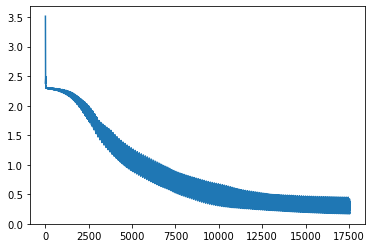

In [19]:
plt.plot(loss_list2)

### 模型准确率验证，结果分析
#### 在与模型1保持相同的配置下准确率91.07%，训练过程可以看出存在一定程度的波动，但整体效果比模型1好很多

In [25]:
bp_net2.eval()
test_num2 = len(data_set.test_labels)
test_input2 = torch.from_numpy(data_set.test_features).float()
test_labels2 = torch.from_numpy(data_set.test_labels).int()
# 预测
test_output2 = bp_net2(test_input2)
print(test_output2.shape)
test_output2 = torch.argmax(test_output2, dim=1)
equal_arr2 = torch.eq(test_output2, test_labels2)
right_count2 = torch.sum(equal_arr2)
acc2 = right_count2.numpy() / test_num2 * 100
print("测试样本总数:{},预测正确样本数:{},模型准确率:{}%".format(test_num2, right_count2, acc2))

torch.Size([10000, 10])
测试样本总数:10000,预测正确样本数:9107,模型准确率:91.07%


## 下一步优化方向
### 1. 采用不同的预处理提取特征的方法
### 2. 增加模型隐藏层深度
### 3. 对比不同的激活函数验证效果